In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [88]:
# Fix seed value
seed=100
np.random.seed(seed)

In [89]:
class Neural_Network():
    def __init__(self, neurons, Activations, initialization='randn'):
        """Define the NN design parameters
        Args:
            neurons (int array): list of number of neurons in each layer
            Activations (str array): list of activations to be used for hidden and output layers
            initialization (str, optional): Choose weight initialization from
             uniform or normal distribution. Defaults to 'randn'.
        """

        self.inputSize = neurons[0] # Number of neurons in input layer
        self.outputSize = neurons[-1] # Number of neurons in output layer
        self.layers = len(neurons)
        self.weights = [] # weights for each layer
        self.biases = [] # biases in each layer
        self.layer_activations = [] # activations for each layer

        if initialization == 'rand':
            self.initializer = np.random.rand
        elif initialization == 'randn':
            self.initializer = np.random.randn
        else:
           raise ValueError("initialization must be 'rand' or 'randn' or 'he' or 'xavier'")
        for i in range(len(neurons)-1):
            self.weights.append(self.initializer(neurons[i+1],neurons[i])) # weight matrix between layer i and layer i+1
            self.biases.append(self.initializer(neurons[i+1],1))
            self.layer_activations.append(Activations[i]) # activations for each layer


    def sigmoid(self, z):
        """returns result of the sigmoid activation function on input z."""
        ### TODO: implement logistic sigmoid activation function
        z=np.clip( z, -500, 500)
        return 1.0 / (1.0 + np.exp(-z))

    def sigmoidPrime(self,z):
        """returns derivative of sigmoid activation function applied on input z."""
        ### TODO: implement derivative of logistic sigmoid function
        z=np.clip( z, -500, 500)
        return self.sigmoid(z)*(1-self.sigmoid(z))

    def tanh(self, z):  #transforms values to -1 to 1
        ### TODO: implement tanh sigmoid activation function
        z=np.clip( z, -500, 500)
        return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

    def tanhPrime(self,z):
        """returns derivative of hyperbolic tan activation function applied on input z."""
        ### TODO: implement derivative of tanh sigmoid activation function
        z=np.clip( z, -500, 500)
        return 1 - self.tanh(z) ** 2

    def linear(self, z):
        """returns result of the linear activation function on input z."""
        ### TODO: implement linear activation function
        z=np.clip( z, -500, 500) # To prevent overflow
        return z

    def linearPrime(self,z):
        """returns derivative of linear activation function applied on input z."""
        ### TODO: implement derivative of linear activation function\
        z=np.clip( z, -500, 500) # To prevent overflow
        return 1-(z==np.nan) # to broadcast 1 to same shape

    def ReLU(self,z):
        """returns result of the ReLU activation function on input z."""
        ### TODO: implement ReLU activation function
        z=np.clip( z, -500, 500 )
        return np.maximum(z, 0)

    def ReLUPrime(self,z):
        """returns derivative of ReLU activation function applied on input z."""
        ### TODO: implement derivative of ReLU activation function
        z=np.clip( z, -500, 500)
        return z >= 0

    def sReLU(self, z):
        """returns result of the sReLU activation function on input z."""
        z=np.clip( z, -500, 500) # To prevent overflow
        return z*self.tanh(np.log(1 + np.exp(z)))

    def sReLUPrime(self, z):
        """returns the derivative of the sReLU activation function on input z."""
        z=np.clip( z, -500, 500) # To prevent overflow
        return self.tanh(np.log(1 + np.exp(z))) + z * self.tanhPrime(np.log(1 + np.exp(z))) * np.exp(z) / (1 + np.exp(z))

    def SSIG(self, z):
        """returns the result of the SSIG activation function on input z."""
        alpha = 5
        z=np.clip( z, -500, 500) # To prevent overflow
        return alpha * z / (1 + np.abs(alpha * z))

    def SSIGPrime(self, z):
        """returns the sub-derivative of the SSIG activation function on input z."""
        alpha = 5
        z=np.clip( z, -500, 500) # To prevent overflow
        return alpha / (1 + np.abs(alpha * z) ** 2)

    def softmax(self, z):
        """returns result of the softmax activation function on input z."""
        ### TODO: implement softmax function
        z=np.clip( z, -500, 500) # To prevent overflow
        return np.exp(z) / np.sum(np.exp(z), axis = 0)

    def softmaxPrime(self,z):
        """returns the derivative of the softmax activation function on input z."""
        z=np.clip( z, -500, 500) # To prevent overflow
        return self.softmax(z)*(1-self.softmax(z))

    def lossSE(self, predicted, actual):
        """Implementation of Squared-error loss function."""
        ### TODO: implement squared error loss function
        return np.mean(0.5 * (predicted - actual) ** 2)

    def lossCE(self, predicted, actual):
        """Implementation of Cross-Entropy loss function."""
        ### TODO: implement cross-entropy loss function
        return - np.sum(actual * np.log(predicted))


    def forward(self, x):
        """Defines forward pass of the NN

        Args:
            x (array): input of size self.inputSize

        Returns:
            a (array): output of the forward pass
            layer_dot_prod_z (list): layerwise intermediate outputs
            layer_activations_a (list): layerwise activations
        """

        layer_activations_a = [] # store the outputs of activation
        a=x  ## storing input as activation of zero-th layer
        layer_dot_prod_z = []
        for i, param in enumerate(zip(self.biases, self.weights)):
            b, w = param[0], param[1]

            ### TODO: implement the computation of z
            z = np.dot(w, a) + b  # Compute z
            # print(z.shape)

            if self.layer_activations[i].lower()=='sigmoid':
                a = self.sigmoid(z)
            elif self.layer_activations[i].lower()=='relu':
                a = self.ReLU(z)
            elif self.layer_activations[i].lower()=='tanh':
                a = self.tanh(z)
            elif self.layer_activations[i].lower()=='linear':
                a = self.linear(z)
            elif self.layer_activations[i].lower()=='srelu':
                a = self.sReLU(z)
            elif self.layer_activations[i].lower()=='ssig':
                a = self.SSIG(z)
            elif self.layer_activations[i].lower()=='softmax':
                a = self.softmax(z)
            else:
              print("Ex")
            layer_dot_prod_z.append(z)
            layer_activations_a.append(a)
        return a, layer_dot_prod_z, layer_activations_a

    def backward(self, x, y, zs, activations):
        """backward pass to calculate gradient of loss w.r.t. NN parameters

        Args:
            x (array): input
            y (array): ouputs from forward pass
            zs (list): layerwise intermediate outputs from forward pass
            activations (list): layerwise activations from forward pass

        Returns:
            [tuple]: gradients with respect to bias and weight parameters respectively
        """

        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]

        #### TODO: implement backpropagation for computation of gradients
        n = zs[-1].shape[1]
        H = self.layers-2 # Remove output and input layer
        #print("zs l", zs[l].shape, "zs l-1", zs[l-1].shape)
        for l in range(H, -1, -1):
          if self.layer_activations[l].lower()=='sigmoid':
              prime = self.sigmoidPrime(zs[l])
          elif self.layer_activations[l].lower()=='relu':
              prime = self.ReLUPrime(zs[l])
          elif self.layer_activations[l].lower()=='tanh':
              prime = self.tanhPrime(zs[l])
          elif self.layer_activations[l].lower()=='linear':
              prime = self.linearPrime(zs[l])
          elif self.layer_activations[l].lower()=='srelu':
              prime = self.sReLUPrime(zs[l])
          elif self.layer_activations[l].lower()=='ssig':
              prime = self.SSIGPrime(zs[l])
          elif self.layer_activations[l].lower()=='softmax':
              prime = self.softmaxPrime(zs[l])

          if l==H:
              delta_l = (activations[l] - y) * prime
          else:
              delta_l = prime * np.dot(self.weights[l+1].T, delta_l)
          grad_b[l] = np.sum(delta_l, axis=1, keepdims=True) / n
          grad_w[l] = np.dot(delta_l, activations[l-1].T) / n if l!=0 else np.dot(delta_l, x.T) / n

        return (grad_b, grad_w)

    def update_parameters(self, grads, lr):
        """update the NN parameters using the gradients

        Args:
            grads (list): gradients obtained from backward pass
            lr (float): learning rate of NN
        """

        grad_b, grad_w = grads[0], grads[1]

        ### TODO: implement updation of bias and weight parameters
        for i in range(len(self.weights)):
            self.weights[i] -= lr*grad_w[i]
            self.biases[i] -= lr*grad_b[i]



    def error(self, X, Y, errors):
        """Appends loss to error list"""
        y = np.squeeze(self.forward(X)[0])
        errors.append(self.loss(y, Y))

    def copy_params(self):
        """Returns a copy of current NN parameters"""
        weights = [w.copy() for w in self.weights]
        biases = [b.copy() for b in self.biases]
        return (weights, biases)

    def train(self, X, Y, lr = 1e-3, max_epochs = 1000, patience=5, batch_size = None, grad_show = True,
              n_classes=10, onehotencoded=False, loss_func='SE', Xval=None, Yval=None, verbose=True):
        """Function for training our Neural Network

        Args:
            X (ndarray): feature matrix of training data,
             Shape: (n,m) where n is no. of features and m is no. of samples.
            Y (ndarray): ground truth of training data, NOT one-hot-encoded. Shape: (1,m).
            lr (float or function, optional): constant learning rate or scheduler function.
             Defaults to 1e-3 constant lr.
            max_epochs (int, optional): epoch cap for training. Defaults to 1000.
            patience (int, optional): patience parameter for early stopping. Defaults to 5.
            batch_size (int, optional): mini-batch size. Defaults to full-batch GD if not provided.
            n_classes (int, optional): no. of classes for multi-class classification required if
            one-hot encoding is set to True. Defaults to 10.
            onehotencoded (bool, optional): Defaults to False.
            loss_func (str, optional): Choose from 'SE' and 'CE' loss functions. Defaults to 'SE'.
            Xval (ndarray, optional): Validation data feature matrix. Defaults to None.
            Yval (ndarray, optional): Validation data ground truth. Defaults to None.
            verbose (bool, optional): If True, displays logs and progress of training. Defaults to True.

        Returns:
            [list/tuple]: lists of train-set and validation-set losses seen over the traning process.
        """
        RECALL=[]
        PRECISION=[]
        ACCURACY=[]
        RECALL_val=[]
        PRECISION_val=[]
        ACCURACY_val=[]
        temp_Y_train=Y
        temp_Y_val=0
        if onehotencoded:
            # a method for creating one hot encoded labels
            def onehotencoding(Y, n):
                # one-hot encoding of class i is just the ith column of the identity
                # matrix of size n where n is the total number of classes. so below
                # code uses Y (a 1d array) for indexing into the identity matrix.
                # Convert labels to start from 0
                #Y -= 1  # Subtract 1 from each label to make them start from 0
                ### TODO: return one-hot encoding for Y
                return np.eye(n)[Y].T

            Y = onehotencoding(Y, n_classes)
            if Yval is not None:
                temp_Y_val=Yval
                Yval = onehotencoding(Yval, n_classes)

        # Below code ensures that Y is 2-dimensional even when one-hot encoding is not
        # performed, so our same code works for training NN for both tasks.
        Y = np.expand_dims(Y,0) if len(Y.shape) == 1 else Y
        Yval = np.expand_dims(Yval,0) if (Yval is not None and len(Yval.shape) == 1) else Yval

        if loss_func == 'SE':
            self.loss = self.lossSE
        elif loss_func == 'CE':
            self.loss = self.lossCE

        train_errors=[]
        if Xval is not None:
            val_errors=[]
        i, j, v = 0, 0, np.inf     ## i -> epoch, j->patience, v ->best loss
        best_params = self.copy_params()

        if batch_size is not None:
            if batch_size > len(X[0]):
                raise ValueError("invalid mini-batch size. Must be smaller than dataset length")
        else:   ## if batch_size is not given
            batch_size = len(X[0])

        #LR control function

        if isinstance(lr, (float, int)):# constant Ir arg is passed to train get_ir lambda x: 1r # we return a function object which returns the same ir at every epoc elif callable(lr): # function in arg is passed to train
           get_lr =lambda X: lr # the function is then used to get in for a particular epoch else: raise ValueError('param Ir can only be a number or a scheduler function")
        elif callable(lr):
          get_lr =lr
        else:
          raise ValueError('param lr can only be a number or a scheduler function')


        gradient_w = np.zeros((self.layers-1, max_epochs))
        gradient_b = np.zeros((self.layers-1, max_epochs))

        while j < patience:

            ### TODO: Implement the training algorithm with option for mini-batches
            # Shuffle Dataset
            idx = np.arange(len(X[0]))
            np.random.shuffle(idx)
            X1 = np.take(X, idx, axis = -1)
            Y1 = np.take(Y, idx, axis = -1)

            #for every batch do
            for q in range(0, len(X1[0]), batch_size):

                start, end = q, min(len(X1[0]), q+batch_size)
                train_x = X1[:, start:end]
                train_y = Y1[:, start:end]

                #do forward pass
                out, dot_prod_z, activations_a = self.forward(train_x)

                #compute gradients using backpropagation
                grads = self.backward(train_x, train_y, dot_prod_z, activations_a)

                #update parameters
                self.update_parameters(grads, get_lr(i))

                # Store current gradients and biases
                for layer in range(self.layers-1):  #storing mean gradients
                    gradient_w[layer][i] = np.sqrt(np.mean(grads[0][layer]**2))
                    gradient_b[layer][i] = np.sqrt(np.mean(grads[0][layer]**2))

            i += 1 # increment epoch count

            self.error(X, Y, train_errors)   ### appending the loss to train_errors
            if Xval is not None:
                self.error(Xval, Yval, val_errors)    ## appending the val_loss to errors

                if val_errors[-1] < v:
                    j = 0 # reset patience counter
                    v = val_errors[-1] # update best loss
                    best_params = self.copy_params() # save params
                else:
                    j += 1 # increment patience counter

            if verbose and i%5 == 0:
                log = f"Epoch {i}..............Loss on train = {train_errors[-1]}"
                if Xval is not None:
                    log += f", Loss on val = {val_errors[-1]}"
                print(log)

            if i%5 == 0:
              RECALL.append(self.recall(X,temp_Y_train))
              PRECISION.append(self.precision(X,temp_Y_train))
              ACCURACY.append(self.accuracy(X,temp_Y_train))
              RECALL_val.append(self.recall(Xval,temp_Y_val))
              PRECISION_val.append(self.precision(Xval,temp_Y_val))
              ACCURACY_val.append(self.accuracy(Xval,temp_Y_val))

            if i >= max_epochs:
                break # stop if epoch threshold crossed

        if Xval is not None:
            if i >= max_epochs and verbose:
                print("Reached Epoch Cap without convergence....Terminating")
            elif verbose:
                print("Early Stopping .............. Returning best weights")

            self.weights, self.biases = best_params # reset to best params

        if verbose:
            x = np.arange(1, len(train_errors)+1)
            plt.plot(x, train_errors, label="Loss on Train")
            if Xval is not None:
                plt.plot(x, val_errors, label="Loss on Val")
            plt.legend()
            plt.title(f"{loss_func} - Learning Rate = {lr} - Batch size = {batch_size}")
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.show()

            if grad_show:

                fig, ax = plt.subplots(1, self.layers-1, figsize=(20, 8))

                for i in range(self.layers-1):
                    ax[i].plot(gradient_w[i])
                    ax[i].set_title(f"Gradient w.r.t. weights - layer {i+1}")
                    ax[i].set_xlabel("Epoch")
                    ax[i].set_ylabel("Gradient (weights)")
                plt.show()
                print("\n")
                fig, ax = plt.subplots(1, 1, figsize=(10, 10))

                for i in range(self.layers-1):
                    ax.plot(gradient_w[i], label=f"layer {i+1}")
                ax.set_title("Gradient w.r.t. weights")
                ax.set_xlabel("Epoch")
                ax.set_ylabel("Gradient (weights)")
                ax.legend()
                plt.show()
                print("\n")


                fig, ax = plt.subplots(1, self.layers-1, figsize=(20, 8))

                for i in range(self.layers-1):
                    ax[i].plot(gradient_b[i])
                    ax[i].set_title(f"Gradient w.r.t. biases - layer {i+1}")
                    ax[i].set_xlabel("Epoch")
                    ax[i].set_ylabel("Gradient (biases)")
                plt.show()
                print("\n")

                fig, ax = plt.subplots(1, 1, figsize=(10, 10))

                for i in range(self.layers-1):
                    ax.plot(gradient_b[i], label=f"layer {i+1}")
                ax.set_title("Gradient w.r.t. biases")
                ax.set_xlabel("Epoch")
                ax.set_ylabel("Gradient (biases)")
                ax.legend()
                plt.show()
                print("\n")

        if Xval is not None:
            return (train_errors, val_errors,np.array(RECALL),np.array(PRECISION),np.array(ACCURACY),np.array(RECALL_val),np.array(PRECISION_val),np.array(ACCURACY_val))
        return train_errors

    def predict(self, x):
      ### TODO: implement prediction for binary and multi-class classification
      temp = self.forward(x)[0]
      if self.outputSize==1: # binary classification
        temp = np.squeeze(temp)
        pred_class = [0 if pred < 0.5 else 1 for pred in temp]
      else: # multi-class classification
        pred_class = np.argmax(temp.T, axis=1)
      return pred_class


    # Calculate recall for each class
    def recall_helper(self,y_true, y_pred, class_label):
       true_positives = np.sum((y_true == class_label) & (y_pred == class_label))
       actual_positives = np.sum(y_true == class_label)
       if actual_positives == 0:
           return 0.0
       return true_positives / actual_positives

    def precision_helper(self,y_true, y_pred, class_label):
       true_positives = np.sum((y_true == class_label) & (y_pred == class_label))
       predicted_positives = np.sum(y_pred == class_label)
       if predicted_positives == 0:
          return 0.0
       #print("Check",true_positives,predicted_positives)
       return true_positives / predicted_positives

    def recall(self, x, y):
      yhat=self.predict(x)
      num_classes = 6
      return [self.recall_helper(y, yhat, class_label) for class_label in range(num_classes)]

    def precision(self, x, y):
      yhat=self.predict(x)
      num_classes = 6
      precisions = [self.precision_helper(y, yhat, class_label) for class_label in range(num_classes)]
      return precisions

    def accuracy(self, x, y):
      yhat=self.predict(x)
      return np.sum(y==yhat)/y.shape[0]

## Question 2A

> Write code to read the data into suitable numpy arrays for features and labels.

In [90]:
#reading into pandas dataframe
df=pd.read_csv("CharRecgn.csv",dtype="int")
df=df.iloc[:,1:]
df.dropna(inplace=True)
df['class']-=1
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,class
0,255,254,255,255,255,252,255,255,255,254,...,255,255,255,255,255,255,255,255,255,0
1,255,254,255,255,254,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
2,254,255,255,255,255,254,255,254,255,255,...,255,255,255,255,255,255,255,255,255,0
3,255,255,255,254,255,255,255,254,255,254,...,255,255,255,255,255,255,255,255,255,0
4,255,255,253,255,255,255,254,255,255,253,...,255,255,255,255,255,255,255,255,255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,255,255,255,255,255,255,255,254,255,254,...,255,255,255,255,255,255,255,255,255,5
1196,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,5
1197,255,255,255,255,255,255,255,255,255,254,...,255,255,255,255,255,255,255,255,255,5
1198,255,255,255,255,255,255,255,254,255,254,...,255,255,255,255,255,255,255,255,255,5


#### Standardize the dataframe
```
class_var=df['class']
df=df.drop(columns=['class'])
df=(df-df.mean())/df.std()
df['class']=class_var
```

In [91]:
#Numpy Array
data=np.array(df)
data, data.shape

(array([[255, 254, 255, ..., 255, 255,   0],
        [255, 254, 255, ..., 255, 255,   0],
        [254, 255, 255, ..., 255, 255,   0],
        ...,
        [255, 255, 255, ..., 255, 255,   5],
        [255, 255, 255, ..., 255, 255,   5],
        [255, 255, 255, ..., 255, 255,   5]]),
 (1200, 784))

### COMMENTS ON DATASET:

- Dataset has 1200 rows and 784 columns.

## Question 2B

> Write the required code to shuffle and split the data set into three sets S1, S2 and S3 such that
S1 contains 70% of the data, S2 contains 15% of the data and S3 contains 15% of the data.
Make sure that the splits contain similar label distributions.

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split data into S1 and temporary set (S_temp) with a 70 : 30 split
S1,S_temp = train_test_split(data, test_size=0.3, stratify=df['class'], random_state=seed)
S_temp=pd.DataFrame(S_temp, columns=df.columns)

# Now, split S_temp into S2 and S3 with equal (15 : 15) split
S2, S3 = train_test_split(S_temp, test_size=0.5, stratify=S_temp['class'], random_state=seed)

In [93]:
# Print the shapes of the dataset
print("Shape of S1: ", S1.shape)
print("Shape of S2: ", S2.shape)
print("Shape of S3: ", S3.shape)

Shape of S1:  (840, 784)
Shape of S2:  (180, 784)
Shape of S3:  (180, 784)


In [94]:
class_distribution_S1 = pd.DataFrame(S1, columns=df.columns)['class'].value_counts()
class_distribution_S2 = pd.DataFrame(S2, columns=df.columns)['class'].value_counts()
class_distribution_S3 = pd.DataFrame(S3, columns=df.columns)['class'].value_counts()

print("Class Distribution in S1:")
print(class_distribution_S1)

print("\nClass Distribution in S2:")
print(class_distribution_S2)

print("\nClass Distribution in S3:")
print(class_distribution_S3)

Class Distribution in S1:
class
5    140
1    140
0    140
4    140
3    140
2    140
Name: count, dtype: int64

Class Distribution in S2:
class
3    30
4    30
0    30
5    30
2    30
1    30
Name: count, dtype: int64

Class Distribution in S3:
class
0    30
2    30
1    30
4    30
5    30
3    30
Name: count, dtype: int64


### COMMENTS :

- S1 contains 70% of the data, S2 contains 15% of the data and S3 contains the remaining 15% of the data, all with similar label distribution

- All S1, S2 and S3 have equal number of labels in all classes (6 distinct classes)

In [95]:
# Convert to numpy array
S1=np.array(S1)
S2=np.array(S2)
S3=np.array(S3)

## Question 2C

> Design a suitable feed forward neural network with 2 or 3 hidden layers with appropriate activation
functions and a corresponding loss function to perform training on the S1 split of Char-
Recgn data set. Justify the design choice of your neural network and loss function and implement
the loss function in the code.

### Justification for Neural Network choice:
Here, I am using Softmax Activation in the last layer. In this case I will get the probability vector of all the classes and the class with the highest probability will get chosen. Since this is a multiclass setting, out of which then the class with highest probability is then chosen for single-label multiclass classification.

For the loss function, I will be using `crossentropy` function. It is implemented in NeuralNetwork class.

Softmax activation in last layer will give certain probabilities that input belong to each class or not. And crossentropy loss in the end would measure the difference between the two.



```
def softmax(self, z):
        """returns result of the softmax activation function on input z."""
        ### TODO: implement softmax function
        z=np.clip( z, -500, 500) # To prevent overflow
        return np.exp(z) / np.sum(np.exp(z), axis = 0)

def softmaxPrime(self,z):
        """returns the derivative of the softmax activation function on input z."""
        z=np.clip( z, -500, 500) # To prevent overflow
        return self.softmax(z)*(1-self.softmax(z))
        
def lossCE(self, predicted, actual):
        """Implementation of Cross-Entropy loss function."""
        return -np.sum(np.multiply(actual, np.log(predicted)))/actual.shape[1]
```



## Question 2D

> Illustrate how you will carry out backpropagation for the loss gradients in the layers. Include its
implementation in code.

Backpropagation can be carried using derivative of softmax and passing it to the L-1 layers. $y^{'}-y$ will be there and it will be multiplied with SoftmaxPrime (derivative of sigmoid) and backpropagated.
Detail of derivation is shown in Notes.
The output comes out as shown below.

```
n=input_size
delta_l=(activations[last_layer]-y)*SoftmaxPrime
grad_b[last_layer]=np.sum(delta_l,axis=1,keepdims=True) /n
grad_w[last_layer]=np.dot(delta_l,activations[l-1].T) /n

```



(840,)


Epoch 5..............Loss on train = 2406.171340149471, Loss on val = 571.3696056360028
Epoch 10..............Loss on train = 2401.6777792994126, Loss on val = 567.5164196655824
Epoch 15..............Loss on train = 2392.1768553646825, Loss on val = 568.2967724813399
Epoch 20..............Loss on train = 2376.0767017859916, Loss on val = 572.8709473383233
Epoch 25..............Loss on train = 2369.3214475041323, Loss on val = 571.3538569642838
Epoch 30..............Loss on train = 2362.571033346559, Loss on val = 569.7753369458637
Epoch 35..............Loss on train = 2352.7814332956978, Loss on val = 568.2153236776035
Epoch 40..............Loss on train = 2327.947758166591, Loss on val = 566.5275063125309
Epoch 45..............Loss on train = 2324.0067992235254, Loss on val = 565.6253790823567
Epoch 50..............Loss on train = 2314.3870662210134, Loss on val = 564.1048240752407
Epoch 55..............Loss on train = 2297.2741764256984, Loss on val = 557.0313732005512
Epoch 60......

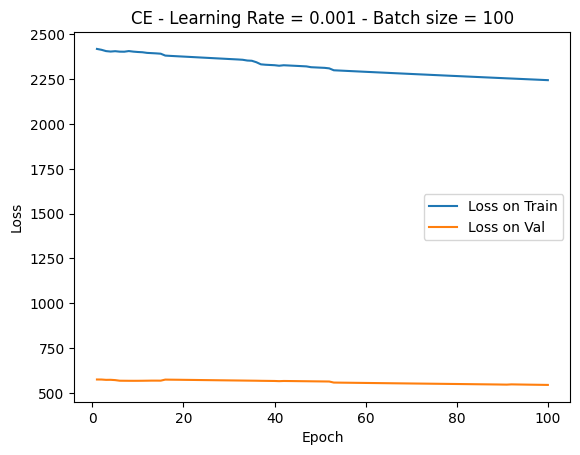

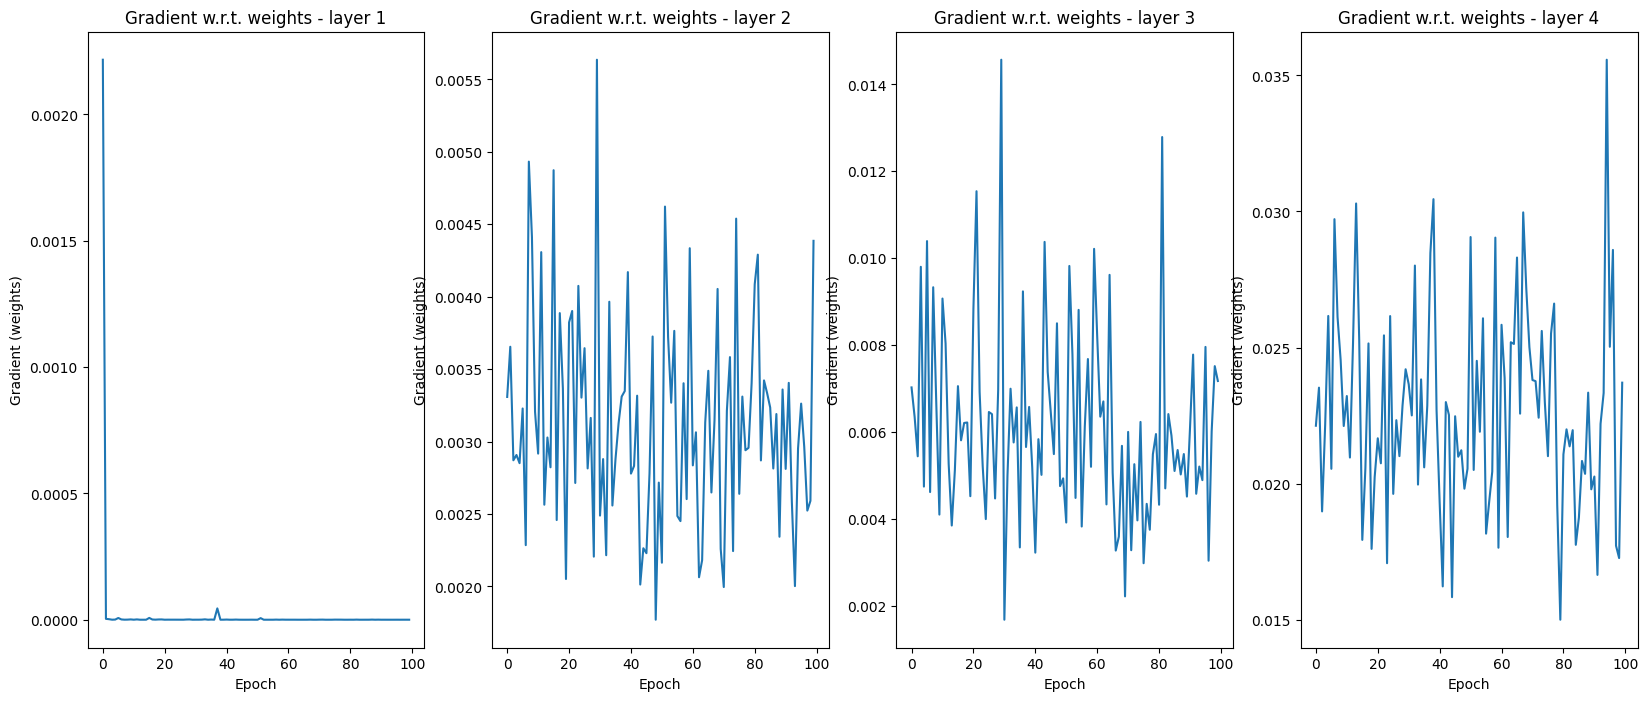

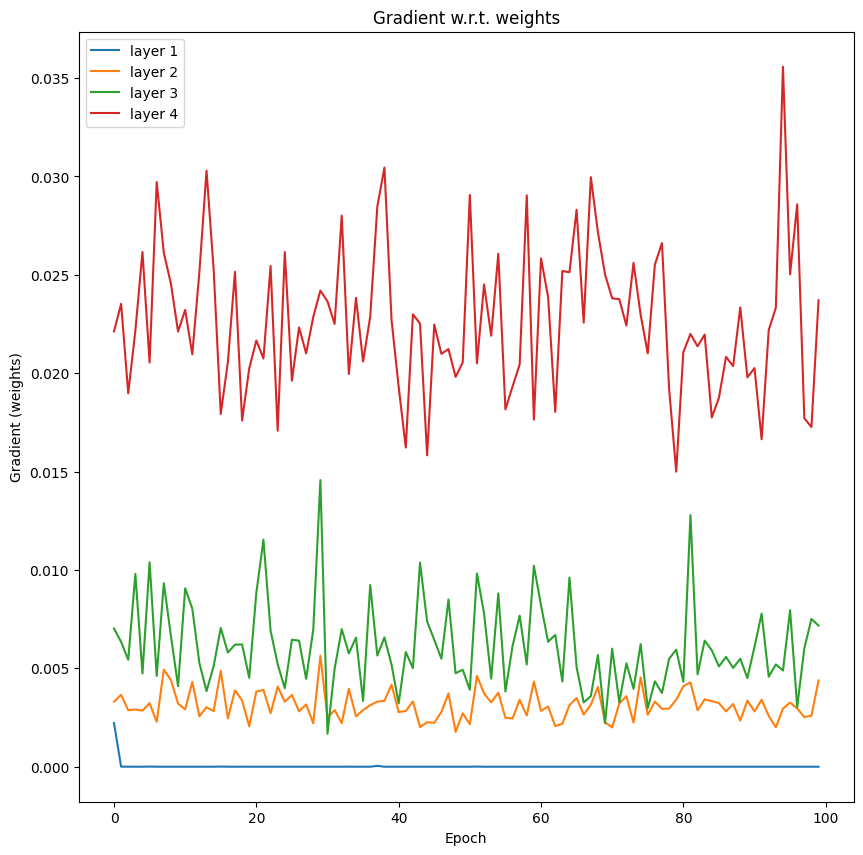

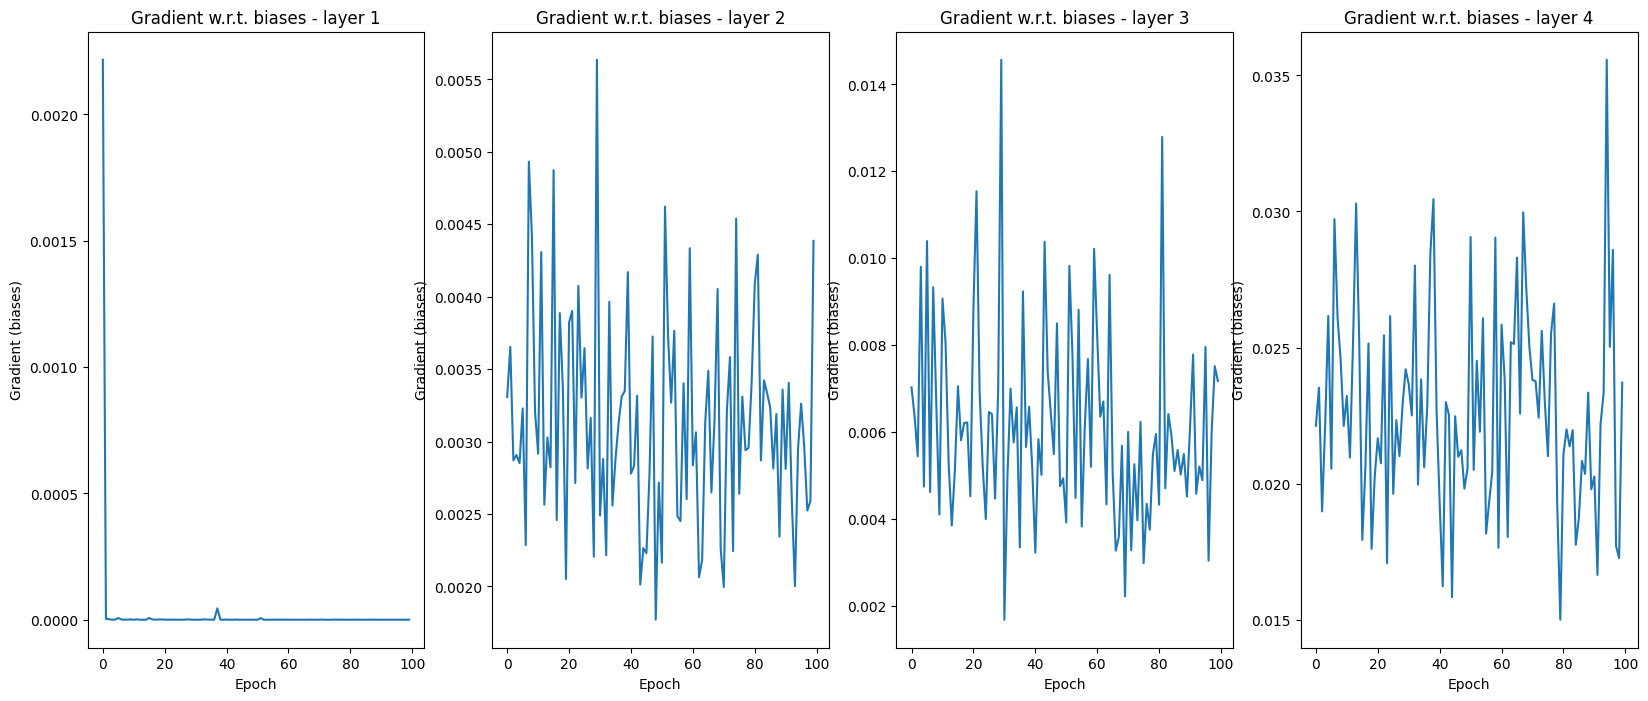

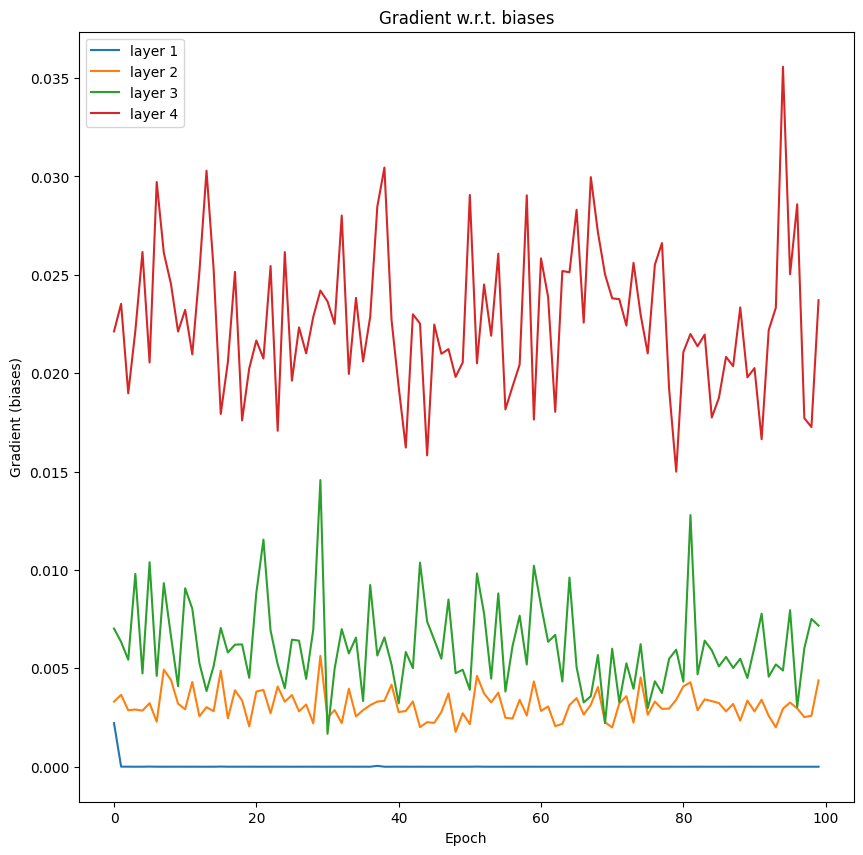

In [96]:
X_train=S1[:,:-1].T
Y_train=S1[:,-1:].reshape(S1[:,-1:].shape[0])

X_val=S2[:,:-1].T
Y_val=S2[:,-1:].reshape(S2[:,-1:].shape[0])

print(Y_train.shape)

# Creating model instance
neurons = [X_train.shape[0], 100, 50, 10,6 ]
activation_functions = ['tanh','tanh','tanh','softmax'] # activations in each layer (Note: the input layer does not have any activation)
nn_multiclass = Neural_Network(neurons, activation_functions,initialization='randn')
params=nn_multiclass.train(X_train, Y_train, patience=100,batch_size=100, lr=0.001, max_epochs=100, n_classes = 6,
                             onehotencoded=True, loss_func='CE', Xval = X_val, Yval = Y_val,verbose=True, grad_show=True)

## Question 2E
> Use accuracy, precision and recall as performance metrics to assess the performance of your
neural network. Recall that the following computations are used to compute accuracy, precision
and recall:
accuracy = $\frac{TP+TN}{TP+TN+FP+FN} $ and precision = $\frac{TP}{TP+FP}$ and recall = $\frac{TP}{TP+FN}$, where TP, TN, FP, FN
denote respectively true positives, true negatives, false positives and false negatives. Implement
in code, the computation of accuracy, precision and recall computed over the data set samples.

Recall is also called as True Positive rate. It measures the sensitivity of model to predict the true positive value when compared to original case.

Recall = $\frac{TP}{TP+FN}$

Also, precision is measure of positive predictiveness of model. It denotes accuracy of positive label classification of model.

Precision = $\frac{TP}{TP+FP}$

For the case of multiclass classification, these metrics need to be calculated for all classes involved. So for each class `i`, positive denotes prediction/actual class is `i`, while any other predicted/actual class is treated as negative.

### CODE implementation

In our case, both Recall and Precision would be equal based on the formula given.
```
  def predict(self, x):
      ### TODO: implement prediction for binary and multi-class classification
      temp = self.forward(x)[0]
      if self.outputSize==1: # binary classification
        temp = np.squeeze(temp)
        pred_class = [0 if pred < 0.5 else 1 for pred in temp]
      else: # multi-class classification
        pred_class = np.argmax(temp.T, axis=1)
      return pred_class
    
    
    # Calculate recall for each class
  def recall_helper(self,y_true, y_pred, class_label):
       true_positives = np.sum((y_true == class_label) & (y_pred == class_label))
       actual_positives = np.sum(y_true == class_label)
       if actual_positives == 0:
           return 0.0
       return true_positives / actual_positives
    
  def precision_helper(self,y_true, y_pred, class_label):
       true_positives = np.sum((y_true == class_label) & (y_pred == class_label))
       predicted_positives = np.sum(y_pred == class_label)
       if predicted_positives == 0:
          return 0.0
       print(true_positives,predicted_positives)
       return true_positives / predicted_positives

  def recall(self, x, y):
      yhat=self.predict(x)
      print("Labels",np.unique(yhat))
      num_classes = 6
      return [self.recall_helper(y, yhat, class_label) for class_label in range(num_classes)]

  def precision(self, x, y):
      yhat=self.predict(x)
      num_classes = 6
      precisions = [self.precision_helper(y, yhat, class_label) for class_label in range(num_classes)]
      return precisions
  
  def accuracy(self, x, y):
      yhat=self.predict(x)
      return np.sum(y==yhat)/y.shape[0]
```
Above logic is applied in code.


## Question 2F

> For the chosen loss function, choose the learning rates from the set {0.01, 0.001, 10−4} and minibatch
sizes from {10, 20, 30, 40}. For each (learning rate, mini-batch size) pair, run the minibatch
stochastic gradient descent algorithm on S1, with 200 epochs (use more epchs if necessary).
For every 5 epochs, record the loss and accuracy, precision and recall achieved on the sets
S1 and S2. Now plot the loss for every 5 epochs for each (learning rate, mini-batch size) pair
on S2 (use a single plot and different colors for different pairs). Plot the accuracy for every 5
epochs for each (learning rate, mini-batch size) pair on S2 (use a single plot and different colors
for different pairs). Also plot the precision for every 5 epochs for each (learning rate, mini-batch
size) pair on S2 (use a single plot and different colors for different pairs). Similarly plot also the
recall for every 5 epochs for each (learning rate, mini-batch size) pair on S2 (use a single plot
and different colors for different pairs). Can you come up with a suitable selection procedure for
the best (learning rate, mini-batch size) pair using the experiments conducted? Explain your
selection procedure and justify.

In [97]:
def NN(LR=[0.01,0.001,0.0001], BS=[10,20,30,40]):
  X_train=S1[:,:-1].T
  Y_train=S1[:,-1:].reshape(S1[:,-1:].shape[0])
  #Y_train=Y_train.reshape(Y_train.shape[0],Y_train.shape[2])
  X_val=S2[:,:-1].T
  Y_val=S2[:,-1:].reshape(S2[:,-1:].shape[0])
  #Y_val=Y_val.reshape(Y_val.shape[0],Y_val.shape[2])
  print(Y_train.shape)
  # Creating model instance

  neurons = [X_train.shape[0], 100, 50, 10,6]
  activation_functions = ['tanh','tanh','tanh','softmax']
  RECALL=[]
  LOSS=[]
  ACCURACY=[]
  PRECISION=[]
  for lr in LR:
    #print('LR done (Outer Loop): ',lr)
    for bs in BS:
      #print('BS done (Inner Loop): ',bs)
      nn_multiclass = Neural_Network(neurons, activation_functions,initialization='randn')
      losses, l,r_train,p_train,a_train,r_val,p_val,a_val= nn_multiclass.train(X_train, Y_train, patience=200,batch_size=bs, lr=lr, max_epochs=200, n_classes = 6,
                                  onehotencoded=True, loss_func='CE', Xval = X_val, Yval = Y_val,verbose=True, grad_show=False)

      LOSS.append(l)
      ACCURACY.append(a_val)
      RECALL.append(r_val)
      #print(nn_multiclass.recall(X_train,Y_train))
      PRECISION.append(p_val)
      #print("PRECISION",p)

  return LOSS, RECALL, PRECISION,ACCURACY


(840,)
Epoch 5..............Loss on train = 3077.003366949813, Loss on val = 630.2121075448445
Epoch 10..............Loss on train = 2772.2382936672293, Loss on val = 584.9806327033851
Epoch 15..............Loss on train = 2518.490847142351, Loss on val = 546.323875554951
Epoch 20..............Loss on train = 2327.1219788011313, Loss on val = 507.61611988107563
Epoch 25..............Loss on train = 2183.934062950404, Loss on val = 477.1056046311642
Epoch 30..............Loss on train = 2045.0562270902278, Loss on val = 452.5586716790914
Epoch 35..............Loss on train = 1909.5450975111144, Loss on val = 426.44603658843613
Epoch 40..............Loss on train = 1797.3602646122165, Loss on val = 399.7987780095911
Epoch 45..............Loss on train = 1721.7319973858998, Loss on val = 381.9117387087873
Epoch 50..............Loss on train = 1668.0909104769505, Loss on val = 370.26733774139814
Epoch 55..............Loss on train = 1623.798387405102, Loss on val = 360.5403123476682
Epoch 

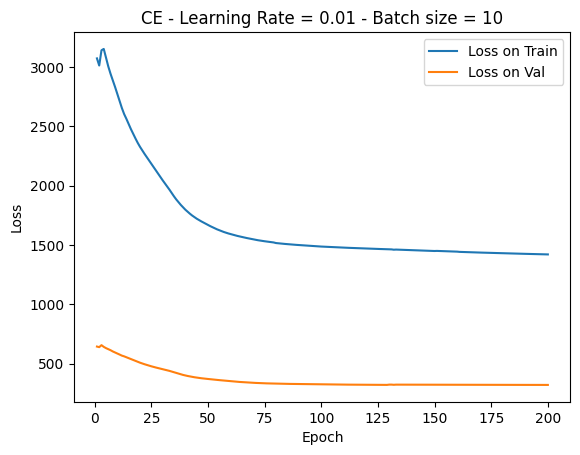

Epoch 5..............Loss on train = 2628.402255465456, Loss on val = 537.3448609072155
Epoch 10..............Loss on train = 2361.757755995318, Loss on val = 500.89631334009584
Epoch 15..............Loss on train = 2201.4140797144255, Loss on val = 484.7460079443543
Epoch 20..............Loss on train = 2096.9591853298853, Loss on val = 470.0672581591698
Epoch 25..............Loss on train = 2018.297449507988, Loss on val = 448.5197492100731
Epoch 30..............Loss on train = 1950.951009923633, Loss on val = 437.6197907462862
Epoch 35..............Loss on train = 1911.0906458989775, Loss on val = 428.7077530127066
Epoch 40..............Loss on train = 1877.6331714031817, Loss on val = 423.47305729424204
Epoch 45..............Loss on train = 1870.9255478324885, Loss on val = 426.3778067221924
Epoch 50..............Loss on train = 1854.5353916668657, Loss on val = 421.0640749847259
Epoch 55..............Loss on train = 1831.6074241431043, Loss on val = 415.34732676993667
Epoch 60....

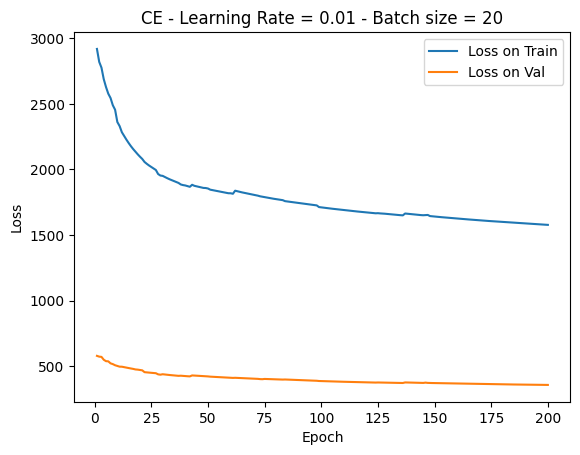

Epoch 5..............Loss on train = 3236.604421242735, Loss on val = 712.8197512073792
Epoch 10..............Loss on train = 2777.7985921008335, Loss on val = 628.0515974202933
Epoch 15..............Loss on train = 2512.15054346558, Loss on val = 553.9734936508255
Epoch 20..............Loss on train = 2332.665017434199, Loss on val = 509.46422504716173
Epoch 25..............Loss on train = 2204.1278262711767, Loss on val = 483.2647233667082
Epoch 30..............Loss on train = 2094.6048224723486, Loss on val = 463.12194224409507
Epoch 35..............Loss on train = 2006.2212216924916, Loss on val = 445.01832711950374
Epoch 40..............Loss on train = 1939.0460733669138, Loss on val = 429.07310118840815
Epoch 45..............Loss on train = 1874.6397091446897, Loss on val = 426.42709111838184
Epoch 50..............Loss on train = 1810.447124437161, Loss on val = 411.88332352236966
Epoch 55..............Loss on train = 1752.032162808966, Loss on val = 394.3402594517222
Epoch 60...

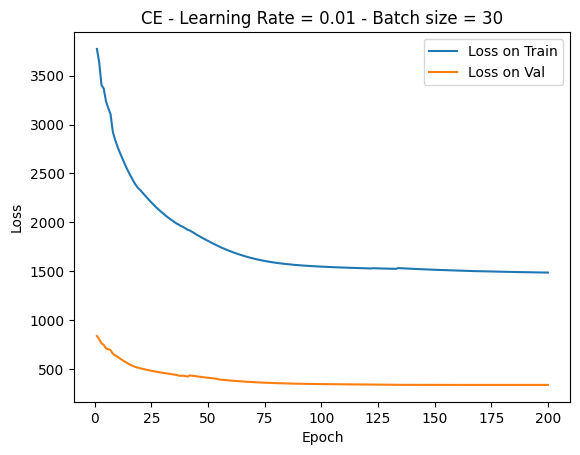

Epoch 5..............Loss on train = 2942.736774813019, Loss on val = 680.5818681722697
Epoch 10..............Loss on train = 2697.0935044005428, Loss on val = 627.2378150635082
Epoch 15..............Loss on train = 2564.261487219185, Loss on val = 597.7632298360467
Epoch 20..............Loss on train = 2471.60226087318, Loss on val = 578.3019329119302
Epoch 25..............Loss on train = 2416.8708230884117, Loss on val = 576.2045782501982
Epoch 30..............Loss on train = 2356.69100965839, Loss on val = 557.9029278956635
Epoch 35..............Loss on train = 2300.9357031248205, Loss on val = 551.4720462649622
Epoch 40..............Loss on train = 2258.919790705523, Loss on val = 548.4700838703468
Epoch 45..............Loss on train = 2222.883391362056, Loss on val = 538.9520236453857
Epoch 50..............Loss on train = 2189.1894714184823, Loss on val = 529.278290639865
Epoch 55..............Loss on train = 2185.393716243273, Loss on val = 521.5290987310004
Epoch 60.............

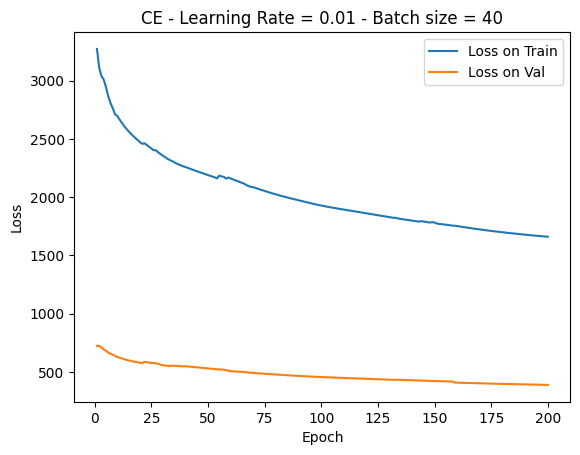

Epoch 5..............Loss on train = 3675.367231280151, Loss on val = 758.717847385417
Epoch 10..............Loss on train = 3524.1441149862594, Loss on val = 729.9813744309292
Epoch 15..............Loss on train = 3335.210500274744, Loss on val = 693.9928856224577
Epoch 20..............Loss on train = 3147.0625939365673, Loss on val = 660.1109151591593
Epoch 25..............Loss on train = 2962.013885226549, Loss on val = 618.6678863884284
Epoch 30..............Loss on train = 2816.6542682555887, Loss on val = 598.6541650038414
Epoch 35..............Loss on train = 2700.3459356236617, Loss on val = 578.2713991876075
Epoch 40..............Loss on train = 2613.110127678065, Loss on val = 574.0147803534077
Epoch 45..............Loss on train = 2541.76868766766, Loss on val = 556.7689318906923
Epoch 50..............Loss on train = 2508.120869351861, Loss on val = 532.9588359821048
Epoch 55..............Loss on train = 2457.6435904015207, Loss on val = 521.4317866853653
Epoch 60...........

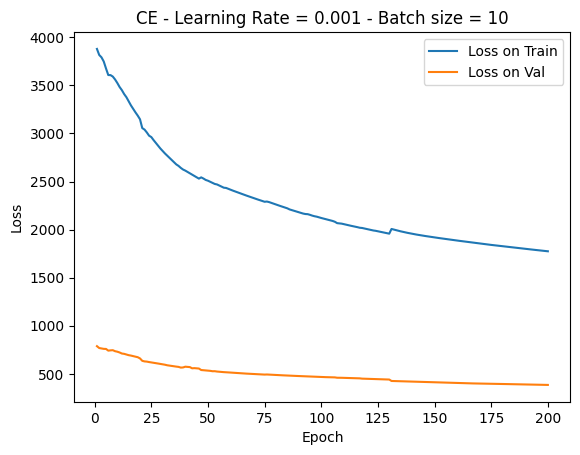

Epoch 5..............Loss on train = 3754.8653335084455, Loss on val = 820.2068404800418
Epoch 10..............Loss on train = 3721.6265402272484, Loss on val = 810.7106741086666
Epoch 15..............Loss on train = 3673.259277762899, Loss on val = 811.0421784483419
Epoch 20..............Loss on train = 3616.4260895695243, Loss on val = 800.1692265454751
Epoch 25..............Loss on train = 3557.1691862828748, Loss on val = 789.2313529938988
Epoch 30..............Loss on train = 3493.642562029402, Loss on val = 778.4623005152969
Epoch 35..............Loss on train = 3428.124308488018, Loss on val = 767.7193828290315
Epoch 40..............Loss on train = 3366.487982696198, Loss on val = 757.6757369359948
Epoch 45..............Loss on train = 3312.1956633636782, Loss on val = 748.7644154917023
Epoch 50..............Loss on train = 3259.3181566620106, Loss on val = 739.4715618785453
Epoch 55..............Loss on train = 3208.8443856394224, Loss on val = 729.4703574879165
Epoch 60.......

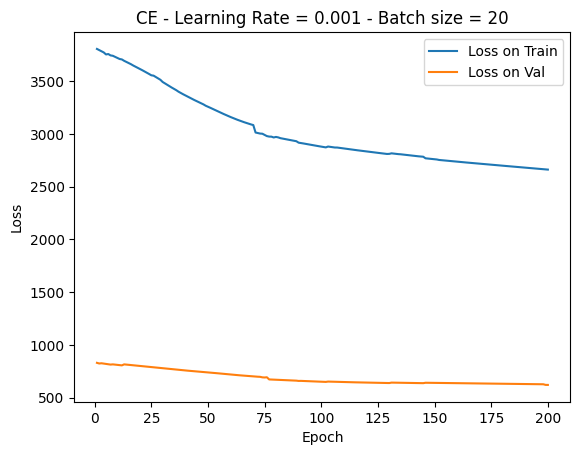

Epoch 5..............Loss on train = 3850.214623996615, Loss on val = 841.4268000512322
Epoch 10..............Loss on train = 3807.332440041172, Loss on val = 831.7129671499391
Epoch 15..............Loss on train = 3752.3037654644518, Loss on val = 821.5568764118938
Epoch 20..............Loss on train = 3702.576221796409, Loss on val = 811.1743534490367
Epoch 25..............Loss on train = 3650.9339275680513, Loss on val = 800.7235086002206
Epoch 30..............Loss on train = 3597.6242400561305, Loss on val = 790.2040913120964
Epoch 35..............Loss on train = 3543.5802057859555, Loss on val = 779.4330346085394
Epoch 40..............Loss on train = 3489.5271425512956, Loss on val = 768.1173276336001
Epoch 45..............Loss on train = 3435.4194046317066, Loss on val = 756.1089919052456
Epoch 50..............Loss on train = 3397.3341215042806, Loss on val = 752.5053046206913
Epoch 55..............Loss on train = 3342.9242093519456, Loss on val = 741.7958662716347
Epoch 60......

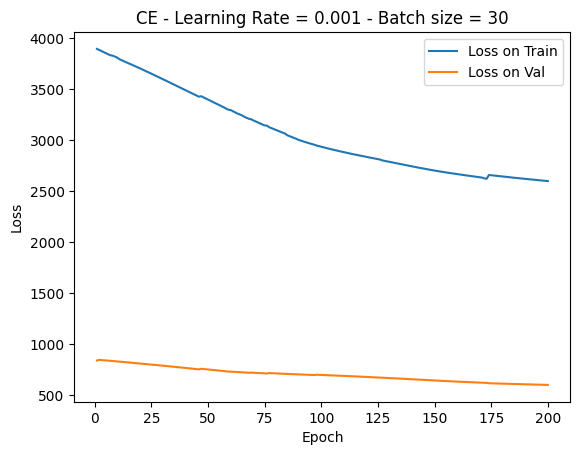

Epoch 5..............Loss on train = 3317.9985661859546, Loss on val = 653.6686512292617
Epoch 10..............Loss on train = 3328.642741625096, Loss on val = 695.2614701536547
Epoch 15..............Loss on train = 3316.7879878787685, Loss on val = 693.462677580049
Epoch 20..............Loss on train = 3306.026473484858, Loss on val = 691.5464409083461
Epoch 25..............Loss on train = 3298.078379628428, Loss on val = 686.6195287809691
Epoch 30..............Loss on train = 3281.463649087248, Loss on val = 683.2863744022902
Epoch 35..............Loss on train = 3269.4426125877103, Loss on val = 681.5140955553234
Epoch 40..............Loss on train = 3256.665687094184, Loss on val = 679.8203970172276
Epoch 45..............Loss on train = 3243.354984340501, Loss on val = 678.1841493701099
Epoch 50..............Loss on train = 3216.0019380577883, Loss on val = 671.5012560671307
Epoch 55..............Loss on train = 3203.1342869709497, Loss on val = 669.7232646752399
Epoch 60..........

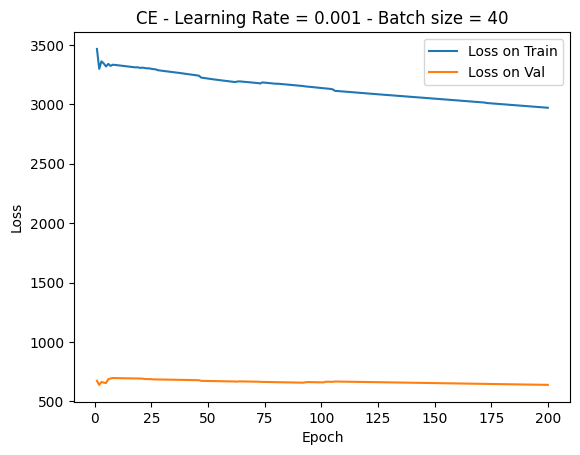

Epoch 5..............Loss on train = 3108.4412405353887, Loss on val = 689.8512134936282
Epoch 10..............Loss on train = 3081.981146867644, Loss on val = 690.4678130131806
Epoch 15..............Loss on train = 3073.3768895921767, Loss on val = 690.9011897033527
Epoch 20..............Loss on train = 3065.7386898489453, Loss on val = 689.8289869504242
Epoch 25..............Loss on train = 2992.8937257977605, Loss on val = 683.0085456147452
Epoch 30..............Loss on train = 2986.331206892187, Loss on val = 681.14798177028
Epoch 35..............Loss on train = 2978.7955635576536, Loss on val = 679.9087295008842
Epoch 40..............Loss on train = 2971.4666560036235, Loss on val = 678.6645483724024
Epoch 45..............Loss on train = 2964.2607781209094, Loss on val = 677.4156727396223
Epoch 50..............Loss on train = 2957.0508359410364, Loss on val = 676.1586620795335
Epoch 55..............Loss on train = 2956.0135963289977, Loss on val = 674.889913742045
Epoch 60........

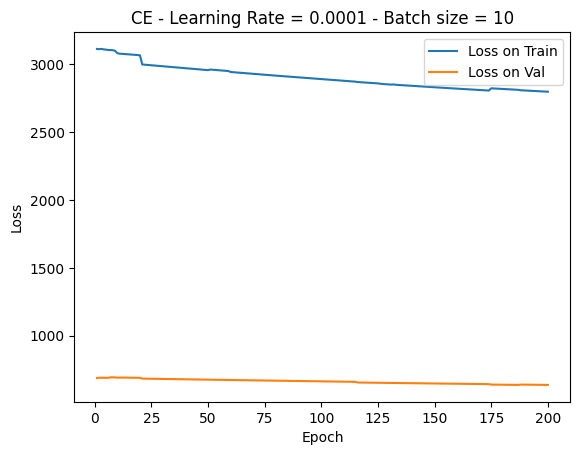

Epoch 5..............Loss on train = 3043.6967100016177, Loss on val = 658.8039291080592
Epoch 10..............Loss on train = 3038.5677213341587, Loss on val = 658.1259961032833
Epoch 15..............Loss on train = 3031.9397853794594, Loss on val = 657.4402860860444
Epoch 20..............Loss on train = 3020.557283194513, Loss on val = 655.971570307694
Epoch 25..............Loss on train = 3015.3949819773266, Loss on val = 655.1407674635884
Epoch 30..............Loss on train = 3010.391188596728, Loss on val = 654.3880543545861
Epoch 35..............Loss on train = 3005.3848630585658, Loss on val = 653.5089762249935
Epoch 40..............Loss on train = 3000.447203600564, Loss on val = 652.6690247188919
Epoch 45..............Loss on train = 2995.54206763709, Loss on val = 651.8833913745863
Epoch 50..............Loss on train = 2990.7618567121763, Loss on val = 651.1325412248085
Epoch 55..............Loss on train = 2985.807233160002, Loss on val = 650.3143527163456
Epoch 60..........

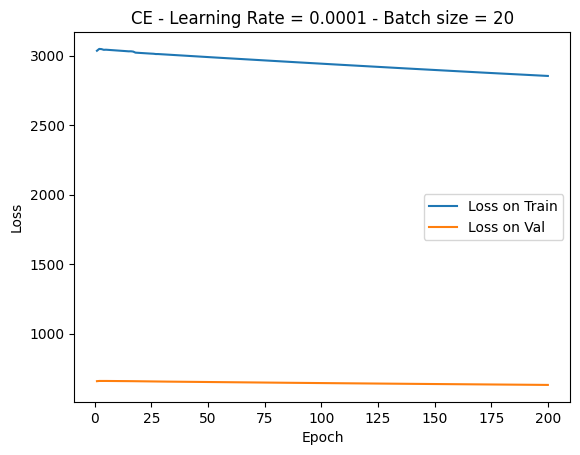

Epoch 5..............Loss on train = 2780.30231973216, Loss on val = 629.2128482756275
Epoch 10..............Loss on train = 2778.5273582414547, Loss on val = 629.0334614069395
Epoch 15..............Loss on train = 2773.1554190348297, Loss on val = 630.377452924313
Epoch 20..............Loss on train = 2771.4146651944266, Loss on val = 630.2045927706513
Epoch 25..............Loss on train = 2769.6788410946574, Loss on val = 630.035861003493
Epoch 30..............Loss on train = 2767.9424288741266, Loss on val = 629.8687012662672
Epoch 35..............Loss on train = 2766.206250721032, Loss on val = 629.702376969377
Epoch 40..............Loss on train = 2764.466214241385, Loss on val = 629.5519834709927
Epoch 45..............Loss on train = 2761.8260323609343, Loss on val = 629.5099268989557
Epoch 50..............Loss on train = 2764.562237200791, Loss on val = 630.1528634706472
Epoch 55..............Loss on train = 2762.2261394129528, Loss on val = 629.938829790395
Epoch 60............

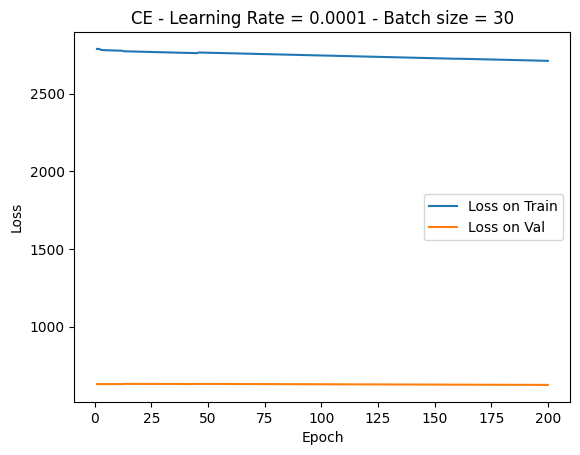

Epoch 5..............Loss on train = 2404.1185894114055, Loss on val = 502.43804179387314
Epoch 10..............Loss on train = 2391.414183214962, Loss on val = 497.4475079498966
Epoch 15..............Loss on train = 2383.290287664666, Loss on val = 496.7229801412257
Epoch 20..............Loss on train = 2378.9780917514777, Loss on val = 496.0193717743154
Epoch 25..............Loss on train = 2374.631967601154, Loss on val = 495.327562374478
Epoch 30..............Loss on train = 2372.933091182984, Loss on val = 495.237170220831
Epoch 35..............Loss on train = 2368.615504272545, Loss on val = 494.1199457031755
Epoch 40..............Loss on train = 2361.6378009984096, Loss on val = 493.3219153552913
Epoch 45..............Loss on train = 2356.6035172242655, Loss on val = 492.67500679468054
Epoch 50..............Loss on train = 2352.2032169925287, Loss on val = 492.0411612748451
Epoch 55..............Loss on train = 2347.9808756518423, Loss on val = 491.4195994383999
Epoch 60........

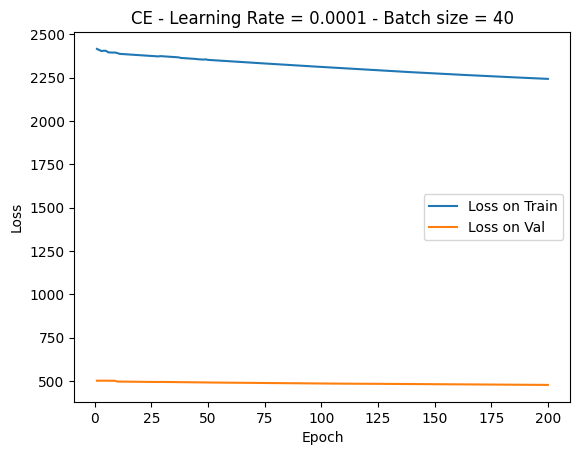

In [98]:
LOSS, RECALL, PRECISION,ACCURACY= NN()

### PLOTTING RECALL FOR VALIDATION SET S2

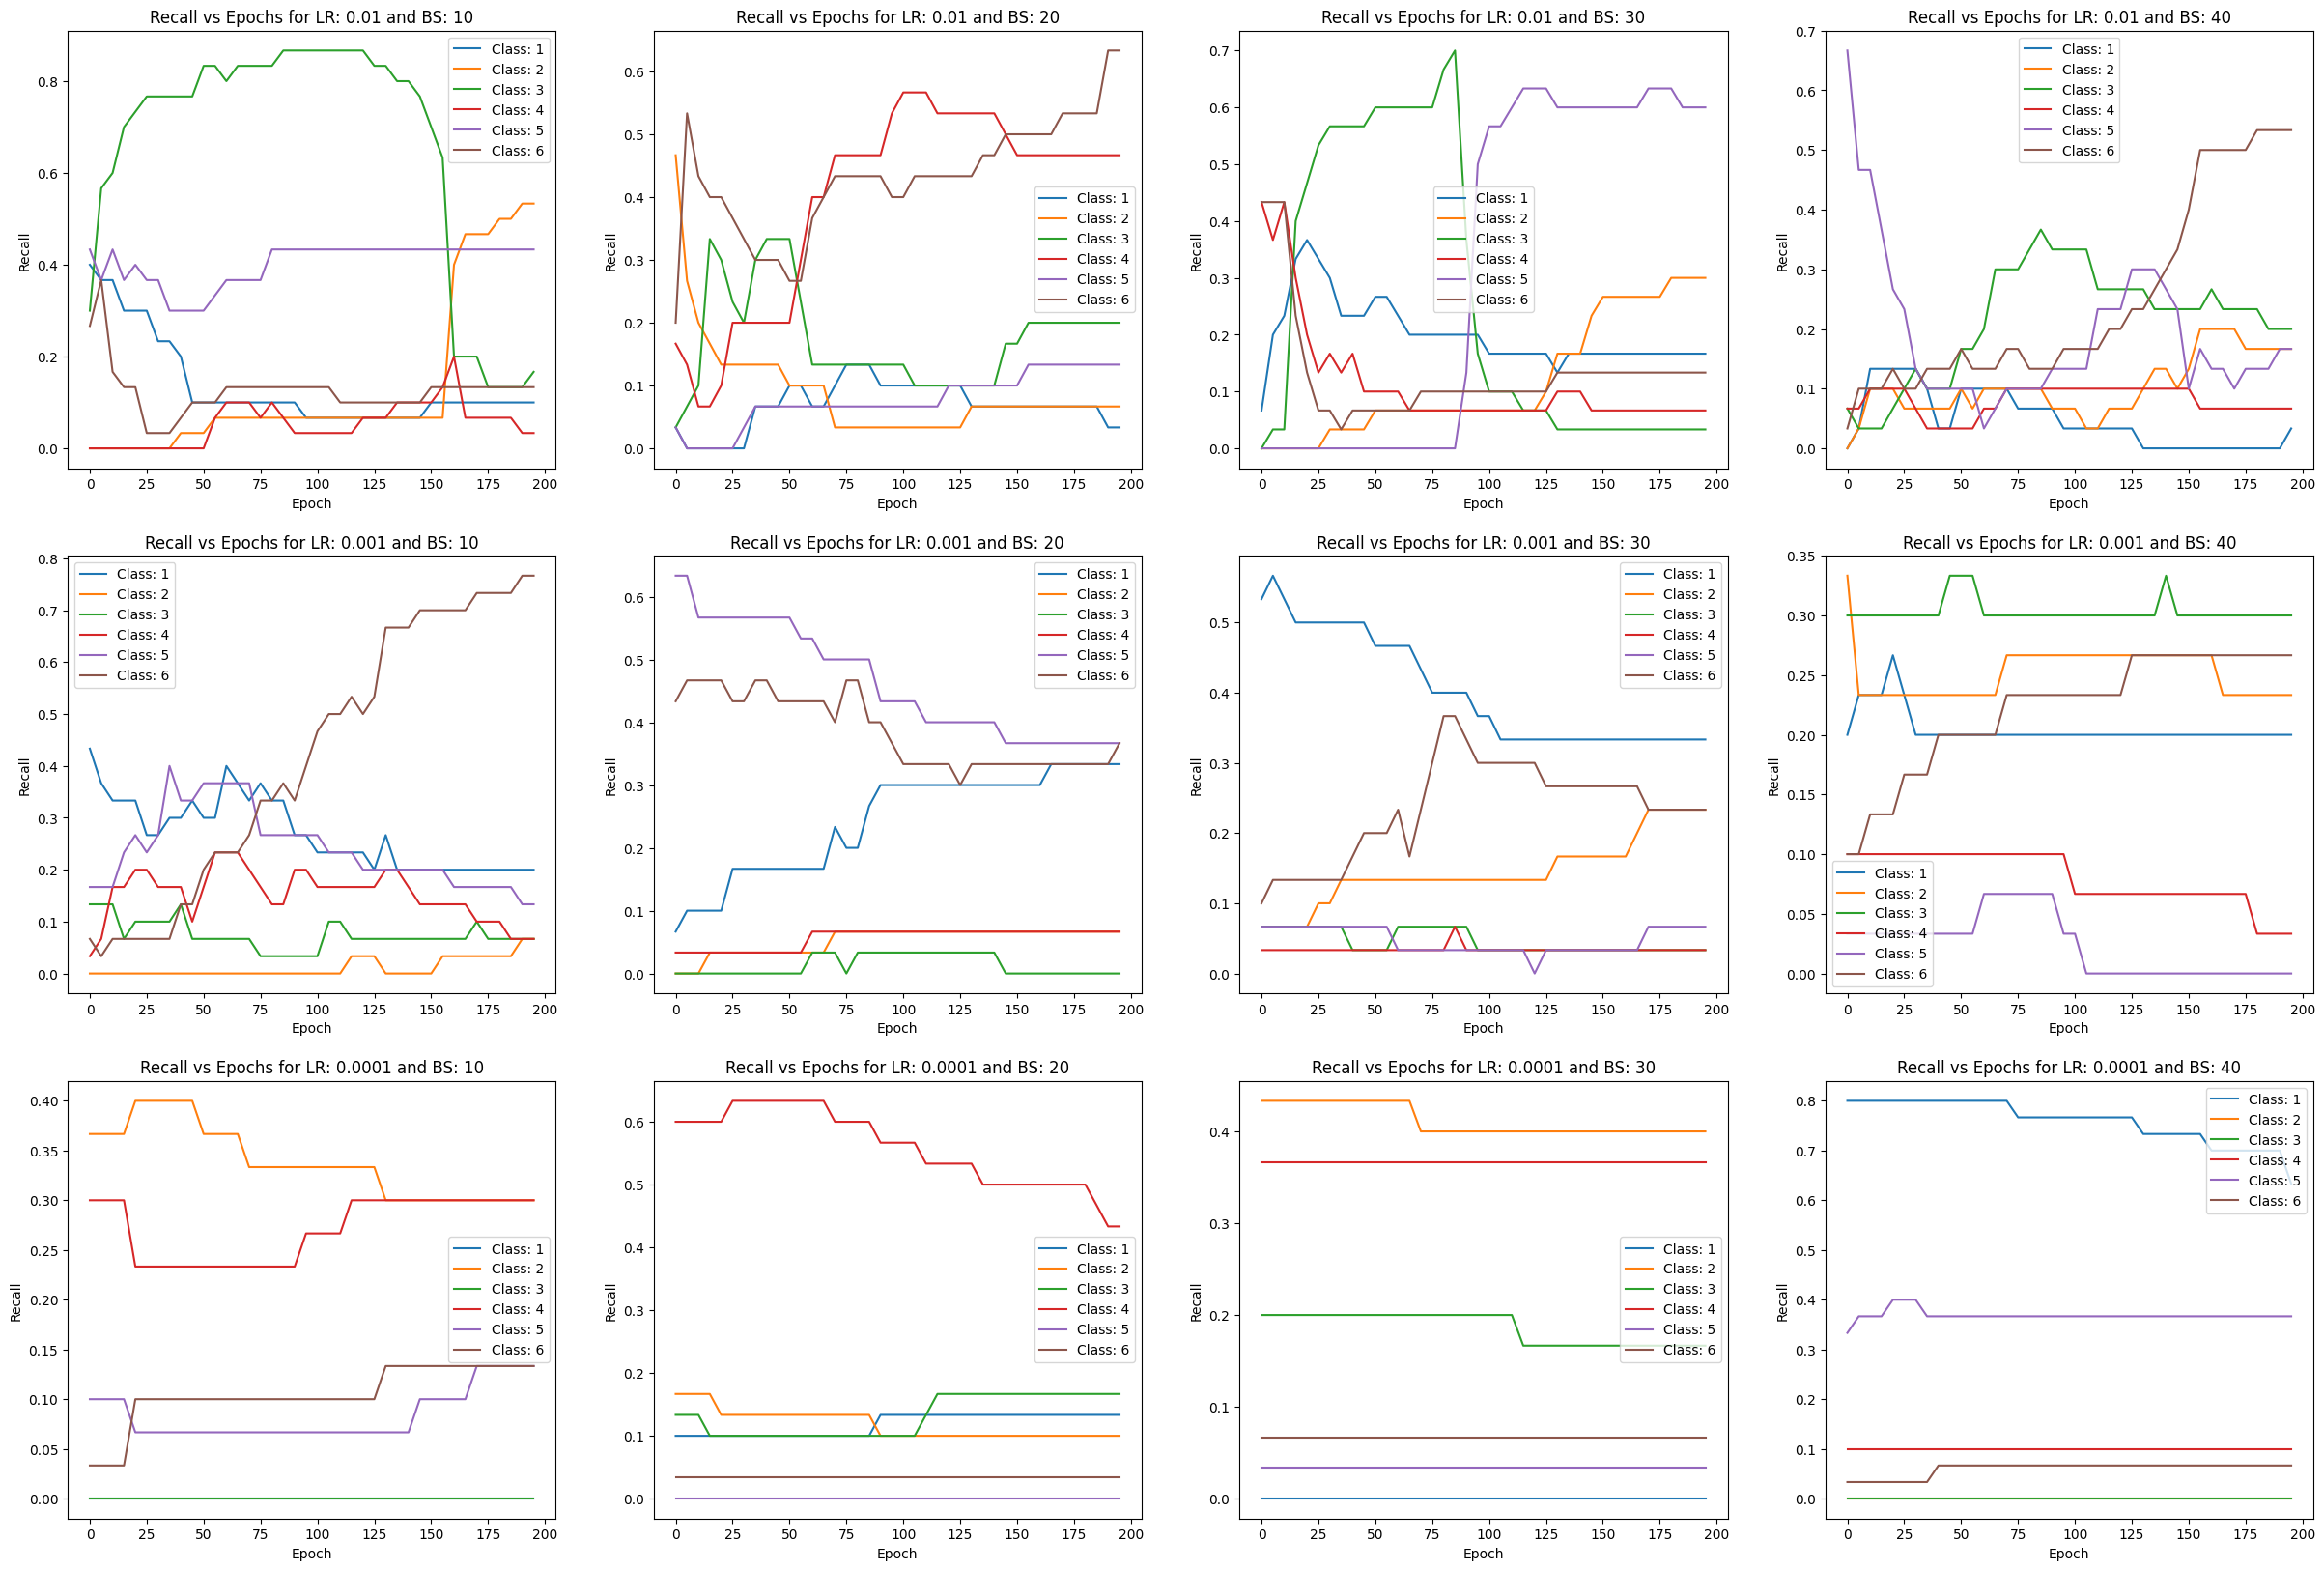

In [99]:

def plot_fig(LR=[0.01,0.001,0.0001], BS=[10,20,30,40]):
  fig, ax = plt.subplots(3,4,figsize=(30,20))
  EPOCHS=np.arange(0,200,5)
  #print(EPOCHS)
  c=0
  for i,lr in enumerate(LR):
    for j,bs in enumerate(BS):
      r=RECALL[c]
      #print(EPOCHS.shape,r.shape)
      for k in range(r.shape[1]):
          ax[i,j].plot(EPOCHS,r[:,k],label=f"Class: {k+1}")
      c+=1
      ax[i,j].set_title(f"Recall vs Epochs for LR: {lr} and BS: {bs}")
      ax[i,j].set_xlabel("Epoch")
      ax[i,j].set_ylabel("Recall")
      ax[i,j].legend()
  plt.show()

plot_fig()

### PLOTTING PRECISION FOR VALIDATION SET S2

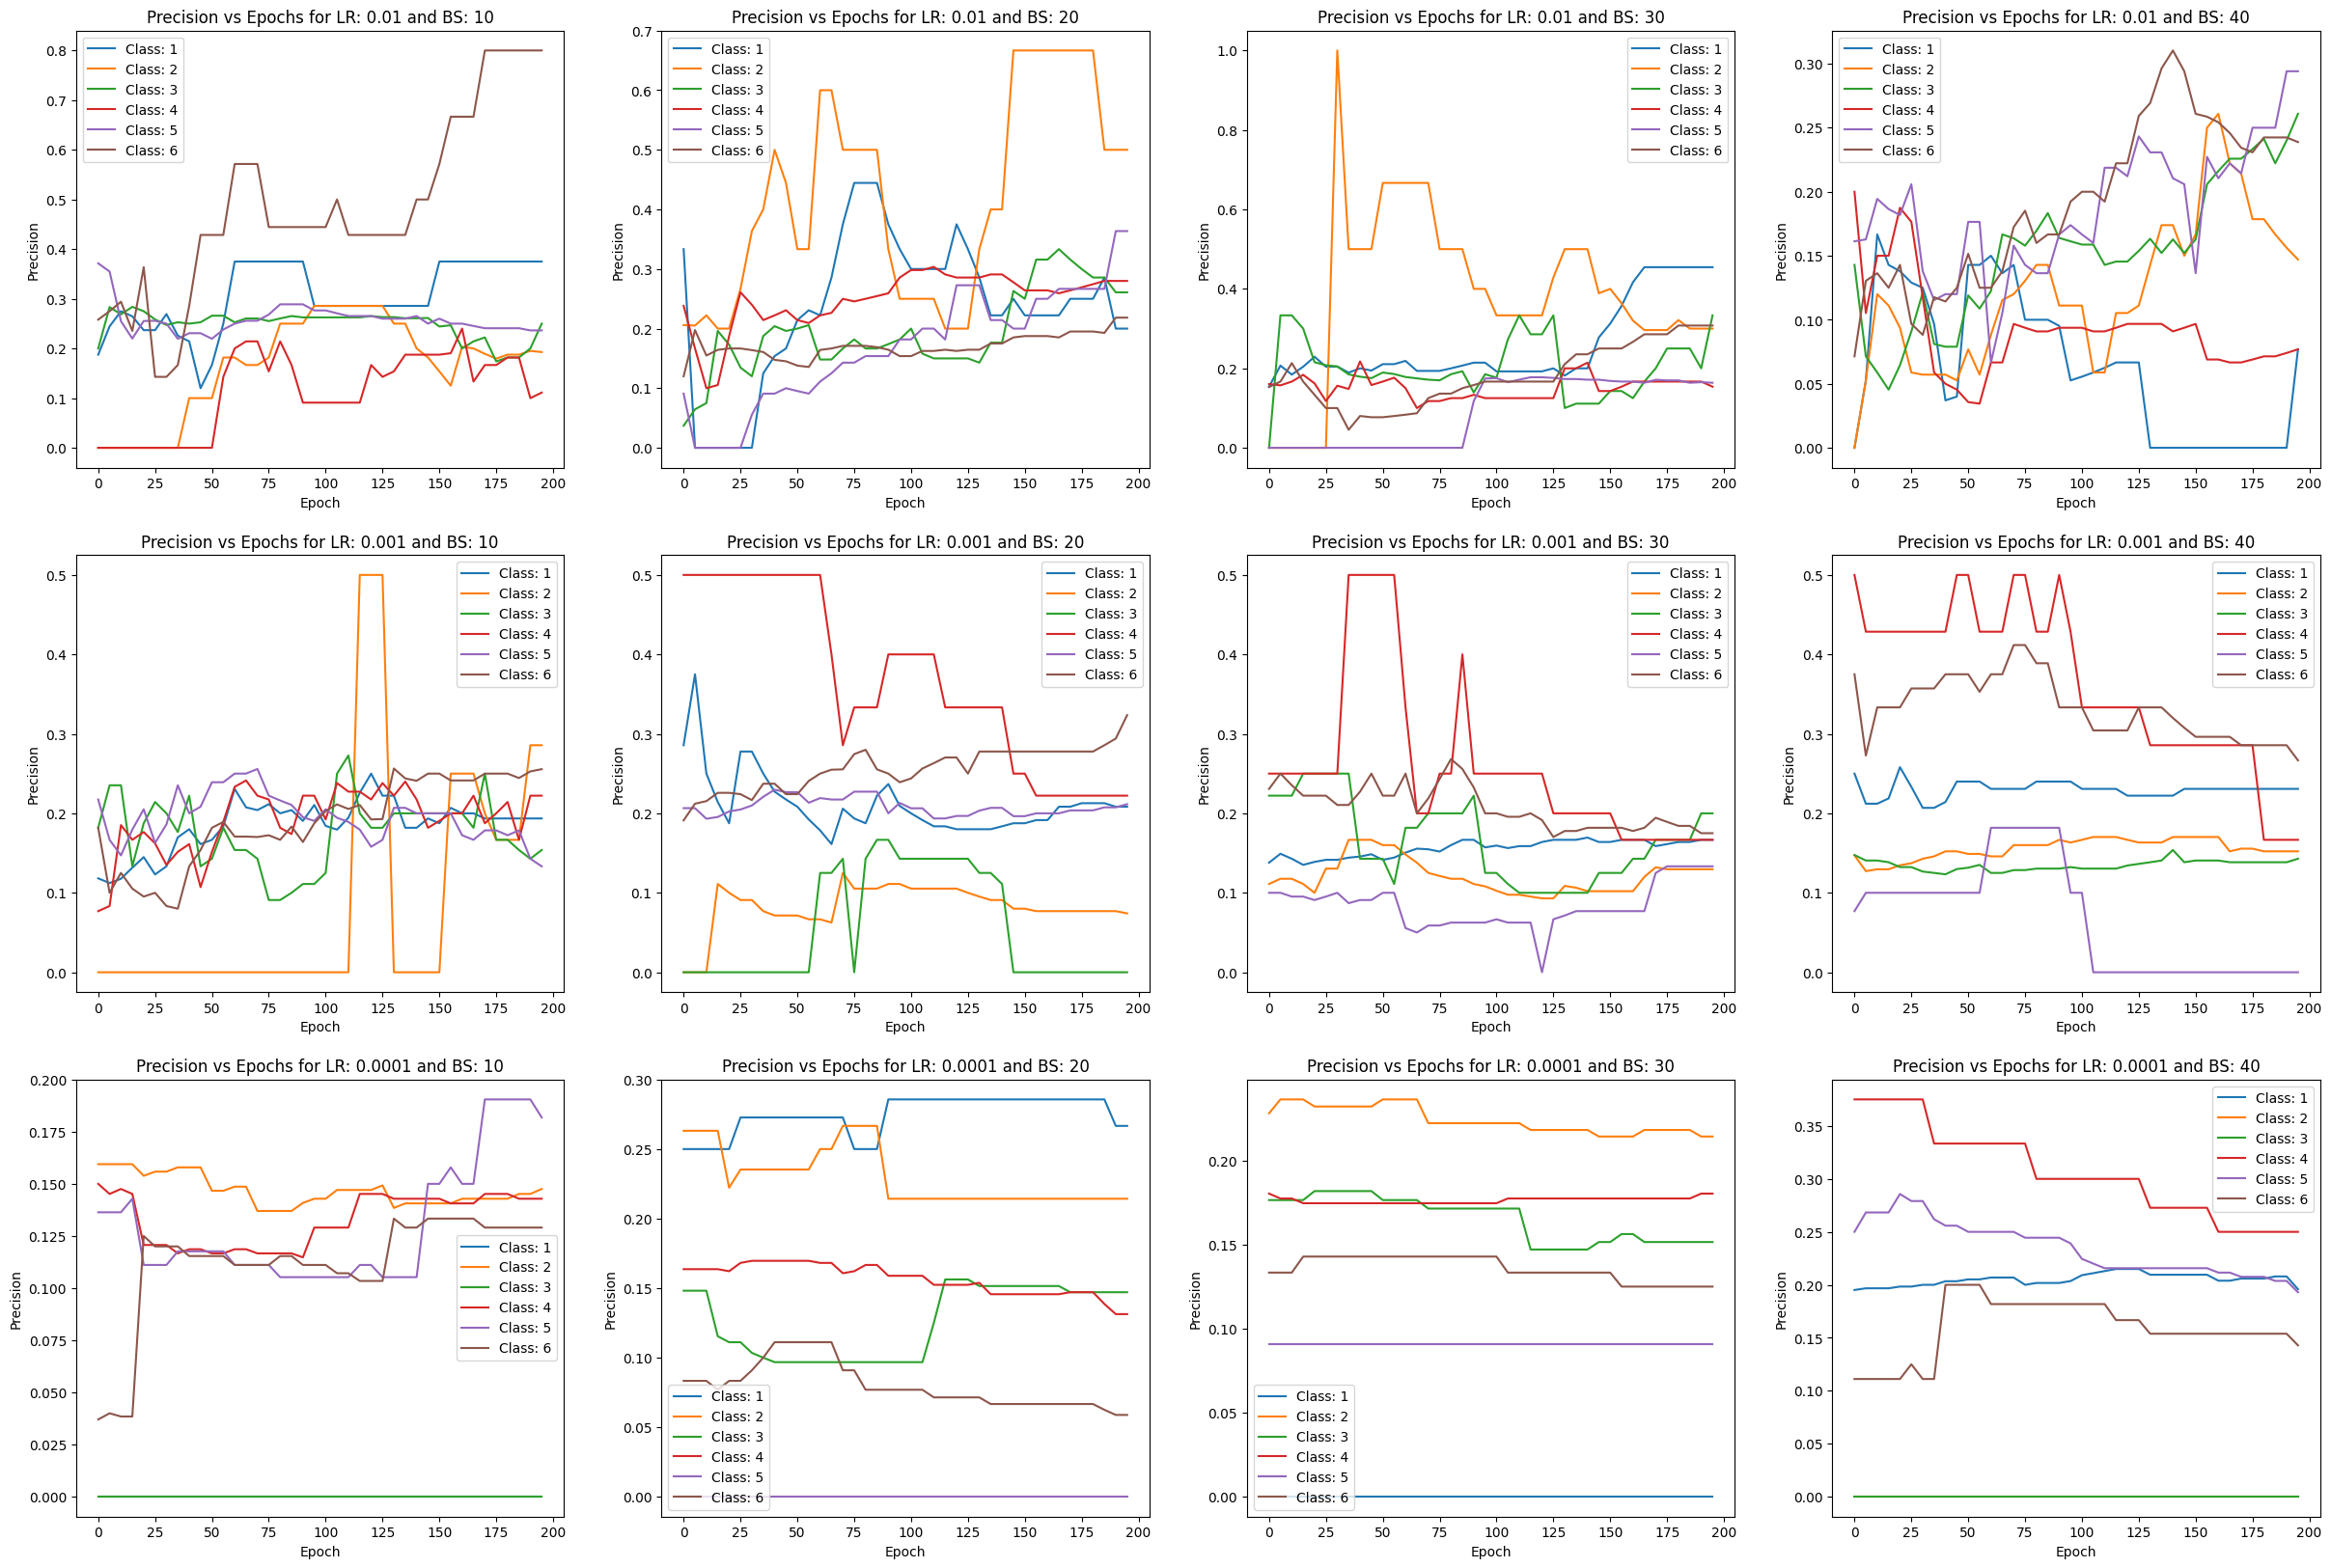

In [100]:
def plot_fig(LR=[0.01,0.001,0.0001], BS=[10,20,30,40]):
  fig, ax = plt.subplots(3,4,figsize=(30,20))
  EPOCHS=np.arange(0,200,5)
  #print(EPOCHS)
  c=0
  for i,lr in enumerate(LR):
    for j,bs in enumerate(BS):
      r=PRECISION[c]
      #print(EPOCHS.shape,r.shape)
      for k in range(r.shape[1]):
          ax[i,j].plot(EPOCHS,r[:,k],label=f"Class: {k+1}")
      c+=1
      ax[i,j].set_title(f"Precision vs Epochs for LR: {lr} and BS: {bs}")
      ax[i,j].set_xlabel("Epoch")
      ax[i,j].set_ylabel("Precision")
      ax[i,j].legend()
  plt.show()

plot_fig()

### PLOTTING ACCURACY FOR VALIDATION SET S2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

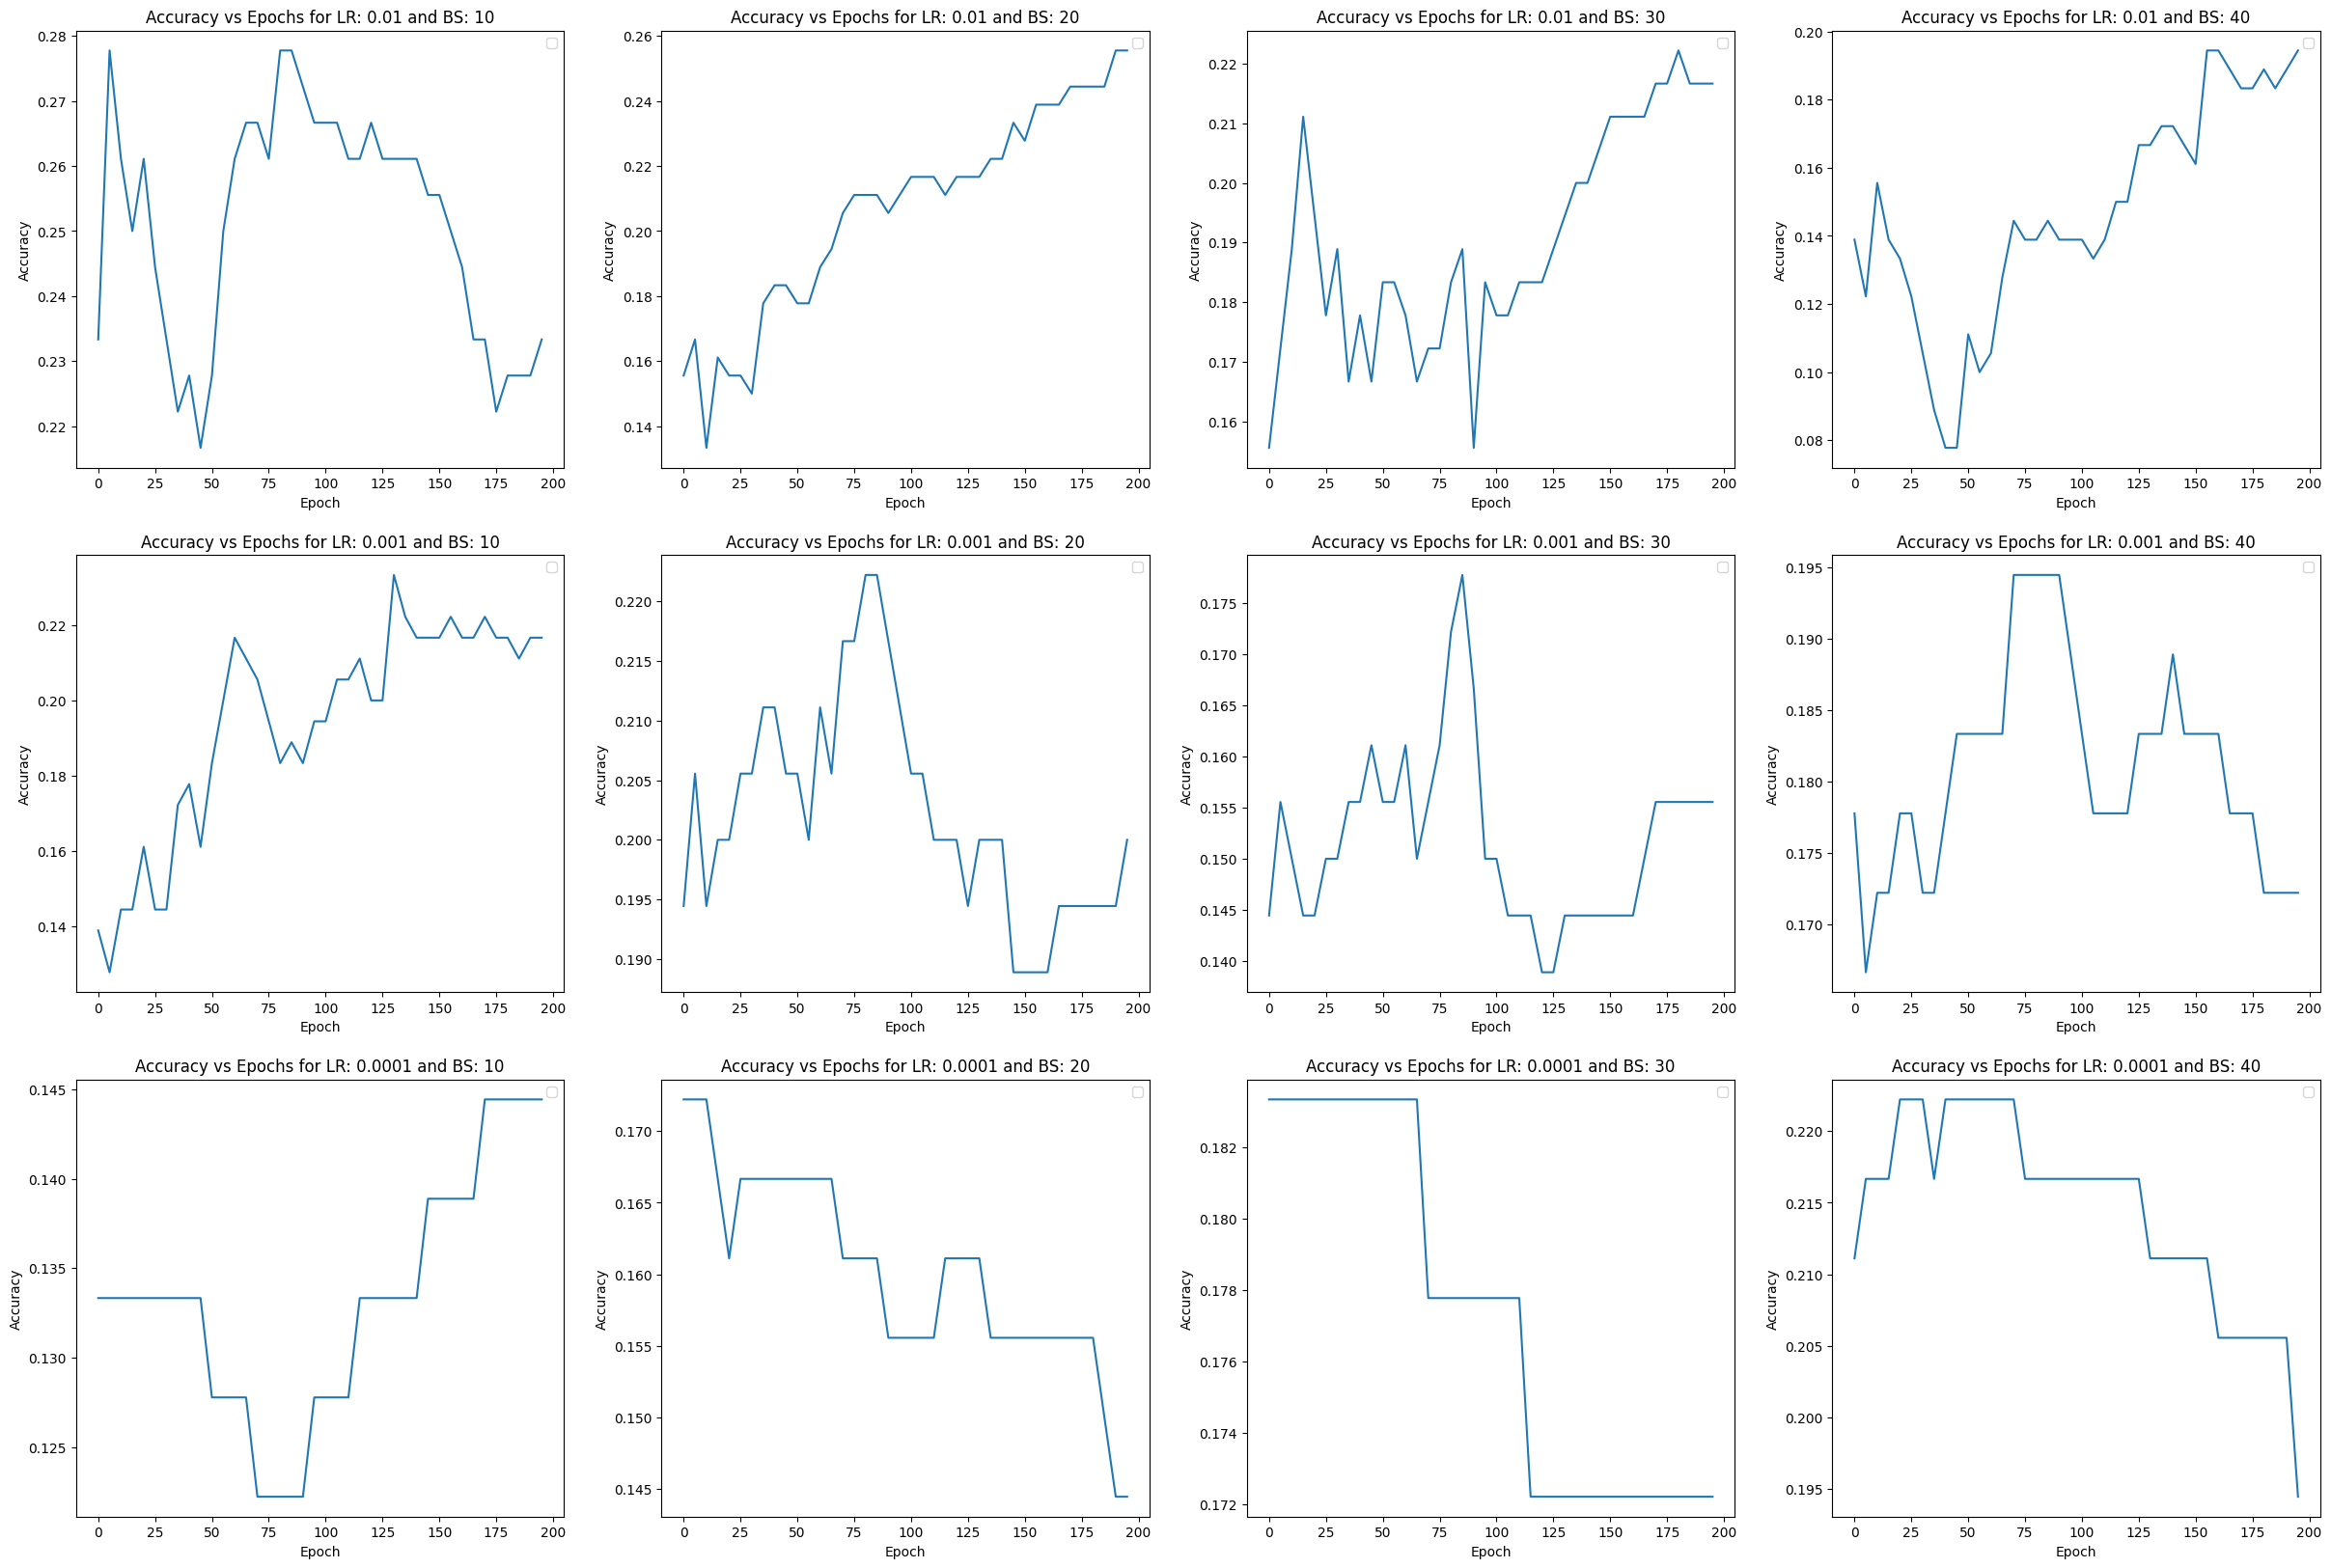

In [101]:
def plot_fig(LR=[0.01,0.001,0.0001], BS=[10,20,30,40]):
  fig, ax = plt.subplots(3,4,figsize=(30,20))
  EPOCHS=np.arange(0,200,5)
  #print(EPOCHS)
  c=0
  for i,lr in enumerate(LR):
    for j,bs in enumerate(BS):
      r=ACCURACY[c]
      #print(EPOCHS.shape,r.shape)
    
      ax[i,j].plot(EPOCHS,r)
      c+=1
      ax[i,j].set_title(f"Accuracy vs Epochs for LR: {lr} and BS: {bs}")
      ax[i,j].set_xlabel("Epoch")
      ax[i,j].set_ylabel("Accuracy")
      ax[i,j].legend()
  plt.show()

plot_fig()

## Selection Procedure:

In this case we consider the following criteria:

* **Loss**: Lower is better. Choose the combination with the lowest loss on S2.
* **Accuracy**: Higher is better. Choose the combination with the highest accuracy on S2. In this case LR=0.01 and BS=40
* **Precision & Recall**: Higher Recall and Precison values are prefered. In this case LR=0.01 and BS=40
Justification for Selection:

The best combination of (learning rate, minibatch size) is determined based on the performance metrics on the validation set S2. This is because S2 represents unseen data, and the goal is to choose hyperparameters that generalize well to new data.


## Best Parameters:

- Batch Size : 40
- Learning Rate : 0.01

## QUESTION 2G

> Using the best (learning rate, mini-batch size) pair identified above, conduct training using mini-batch SGD on the set S1 U S2 with max epochs set to 500. For every 5 epochs, record the loss and accuracy, precision and recall achieved on the sets S1 U S2 and S3. Include a stopping condition such that you can stop the training when the accuracy on the set S1 U S2 does not increase significantly for p epochs with a suitable choice for p. Plot the loss on S1 U S2 and S3 in a single plot and comment on the observations. Plot the accuracy on S1 U S2 and S3 in a single
plot and comment on the observations. Similarly plot precision on S1 U S2 and S3 in a single plot and comment on the observations. Also plot recall on S1 U S2 and S3 in a single plot and comment on the observations.

In [102]:
# Cocatenate arrays
S1US2=np.concatenate((S1,S2),axis=0)
# Shuffle the array in-place
np.random.shuffle(S1US2)
print("Shape:",S1US2.shape)

Shape: (1020, 784)


Epoch 5..............Loss on train = 3465.393849875947, Loss on val = 812.4349120940669
Epoch 10..............Loss on train = 3118.808037941135, Loss on val = 778.7423280964642
Epoch 15..............Loss on train = 2906.5408519900006, Loss on val = 665.2389318913207
Epoch 20..............Loss on train = 2732.851529098263, Loss on val = 614.39515416703
Epoch 25..............Loss on train = 2594.8991901413706, Loss on val = 584.6839348564562
Epoch 30..............Loss on train = 2446.7251061102947, Loss on val = 545.0562516800665
Epoch 35..............Loss on train = 2291.5409462099497, Loss on val = 535.991142206842
Epoch 40..............Loss on train = 2303.5633271456068, Loss on val = 553.2044953757963
Epoch 45..............Loss on train = 2214.559976108335, Loss on val = 553.8772356080426
Epoch 50..............Loss on train = 2121.7264656126827, Loss on val = 539.701844961522
Epoch 55..............Loss on train = 2046.8831319338342, Loss on val = 522.1296359264306
Epoch 60...........

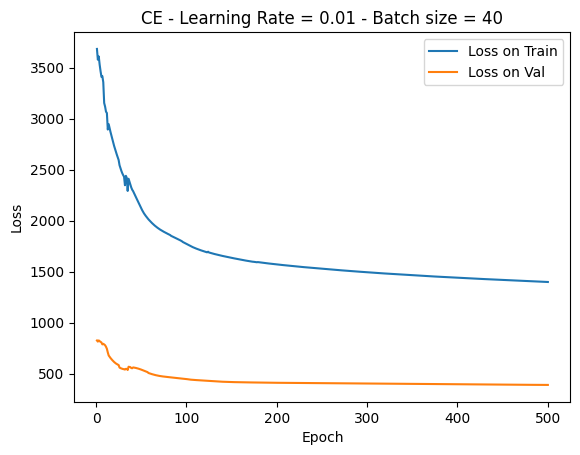

In [103]:
neurons = [X_train.shape[0], 100, 50, 10,6]
activation_functions = ['tanh','tanh','tanh','softmax']
nn_multiclass = Neural_Network(neurons, activation_functions,initialization='randn')
losses, l,r_train,p_train,a_train,r_val,p_val,a_val= nn_multiclass.train(X_train, Y_train, patience=200,batch_size=40, lr=0.01, max_epochs=500, n_classes = 6,
                                  onehotencoded=True, loss_func='CE', Xval = X_val, Yval = Y_val,verbose=True, grad_show=False)

In [104]:
print(r_val.shape,r_train.shape)

(100, 6) (100, 6)


## COMMENTS :

- The above plot shows the loss over the train set which is S1 U S2 and the validation set which is S3
- The loss decreases for the starting epochs, but seems to converge after 500 epochs. This indicates that further training will not affect the model output much

### RECALL VS EPOCH

[[0.00714286 0.38571429 0.15714286 0.08571429 0.45714286 0.20714286]
 [0.00714286 0.28571429 0.27142857 0.10714286 0.41428571 0.28571429]
 [0.01428571 0.36428571 0.17142857 0.12857143 0.34285714 0.37142857]
 [0.02142857 0.36428571 0.2        0.11428571 0.33571429 0.40714286]
 [0.02857143 0.4        0.22857143 0.10714286 0.34285714 0.42857143]
 [0.03571429 0.31428571 0.22142857 0.12142857 0.3        0.49285714]
 [0.05714286 0.29285714 0.22857143 0.11428571 0.32857143 0.5       ]
 [0.07857143 0.23571429 0.27142857 0.1        0.33571429 0.47142857]
 [0.09285714 0.24285714 0.24285714 0.1        0.36428571 0.49285714]
 [0.12142857 0.25714286 0.26428571 0.1        0.37142857 0.5       ]
 [0.12857143 0.24285714 0.27142857 0.12142857 0.4        0.47142857]
 [0.13571429 0.22857143 0.27857143 0.12142857 0.40714286 0.46428571]
 [0.15714286 0.22857143 0.28571429 0.11428571 0.42857143 0.44285714]
 [0.15714286 0.25       0.27857143 0.11428571 0.42857143 0.42857143]
 [0.14285714 0.25       0.26428571

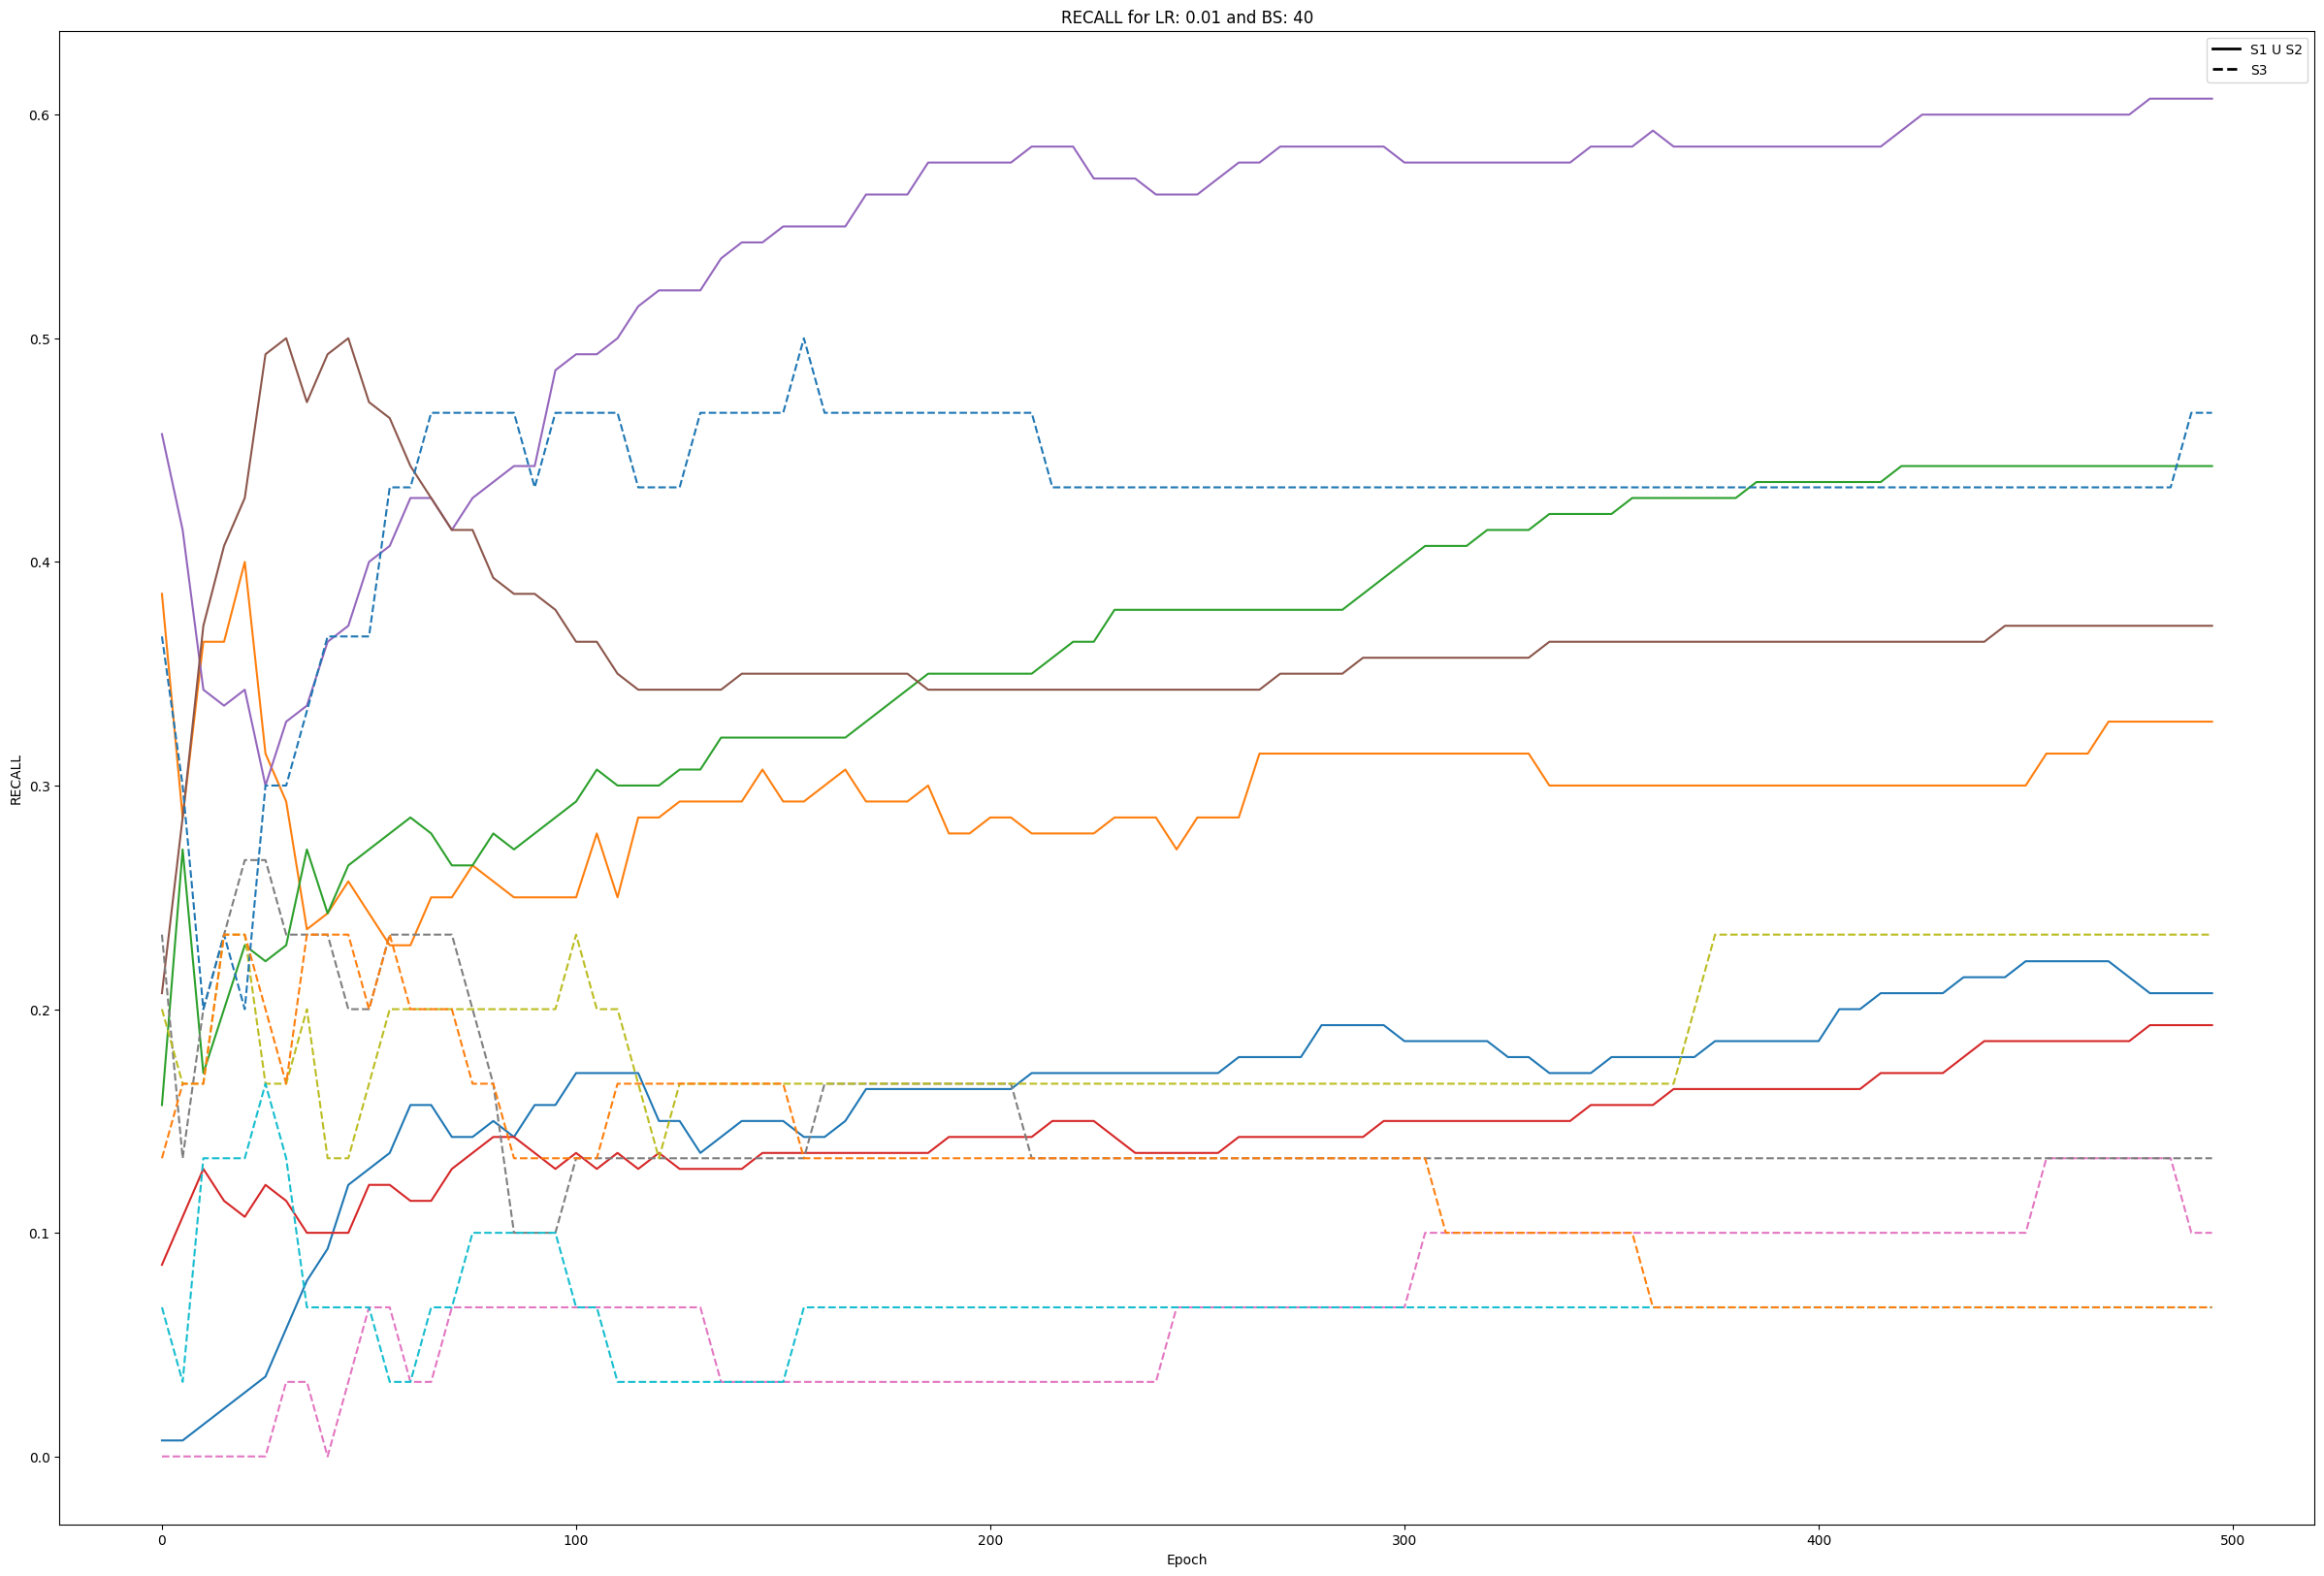

In [105]:
from matplotlib.lines import Line2D
def plot_fig(array1,array2, LR=0, BS=0,title=''):
  fig, ax = plt.subplots(1,1,figsize=(30,20))
  EPOCHS=np.arange(0,500,5)
  #print(EPOCHS)
  r=array1

  # Create custom legend entries with labels and line styles
  legend_entries = [
    Line2D([0], [0], color='black', lw=2, linestyle='solid', label='S1 U S2'),
    Line2D([0], [0], color='black', lw=2, linestyle='dashed', label='S3'),
  ]
  print(r)
      #print(EPOCHS.shape,r.shape)
  for k in range(r.shape[1]):
        ax.plot(EPOCHS,r[:,k],label=f"Class: {k+1}",linestyle='solid')
  ax.legend()


  r=array2
      #print(EPOCHS.shape,r.shape)
  for k in range(r.shape[1]):
        ax.plot(EPOCHS,r[:,k],linestyle='dashed')

  ax.set_title(f"{title} for LR: {LR} and BS: {BS}")
  ax.set_xlabel("Epoch")
  ax.set_ylabel("RECALL")
  ax.legend(handles=legend_entries)
  plt.show()

plot_fig(r_train,r_val,0.01,40,'RECALL')

In the above Recall vs Epochs plot, the solid lines stand for S1 U S2, while the dashed ones stand for S3.

The plot is a bit cluttered as we need to plot recall for 6 classes, for both train and validation, giving us 12 lines.


## COMMENTS:

- We see that while at the start the recall values fluctuate a lot, they eventually stabalize.
- In general, the train recall values (solid) are higher than the validation recall values (dashed), indicating some sort of overfitting.
- Different classes have different recalls at convergence, indicating the model does not predict all classes uniformly.

### PRECISION VS EPOCH

[[0.5        0.24434389 0.17460317 0.22222222 0.20983607 0.21969697]
 [0.14285714 0.25974026 0.24050633 0.1875     0.21722846 0.22988506]
 [0.22222222 0.28813559 0.18604651 0.17307692 0.23880597 0.23636364]
 [0.42857143 0.32278481 0.2        0.16161616 0.24226804 0.23553719]
 [0.33333333 0.36129032 0.21192053 0.16304348 0.26086957 0.24390244]
 [0.27777778 0.2972973  0.2137931  0.16190476 0.22222222 0.29361702]
 [0.30769231 0.32539683 0.22222222 0.15686275 0.2254902  0.29411765]
 [0.24444444 0.30555556 0.2345679  0.1443299  0.22274882 0.30414747]
 [0.23636364 0.33663366 0.22818792 0.15217391 0.22077922 0.3254717 ]
 [0.24637681 0.37113402 0.24503311 0.15730337 0.22413793 0.34653465]
 [0.21686747 0.3655914  0.24358974 0.1954023  0.23829787 0.35483871]
 [0.21348315 0.35164835 0.24683544 0.19101124 0.24255319 0.36516854]
 [0.23913043 0.35955056 0.25157233 0.17777778 0.24291498 0.3803681 ]
 [0.22916667 0.38461538 0.25       0.16842105 0.23715415 0.40268456]
 [0.21052632 0.38043478 0.23870968

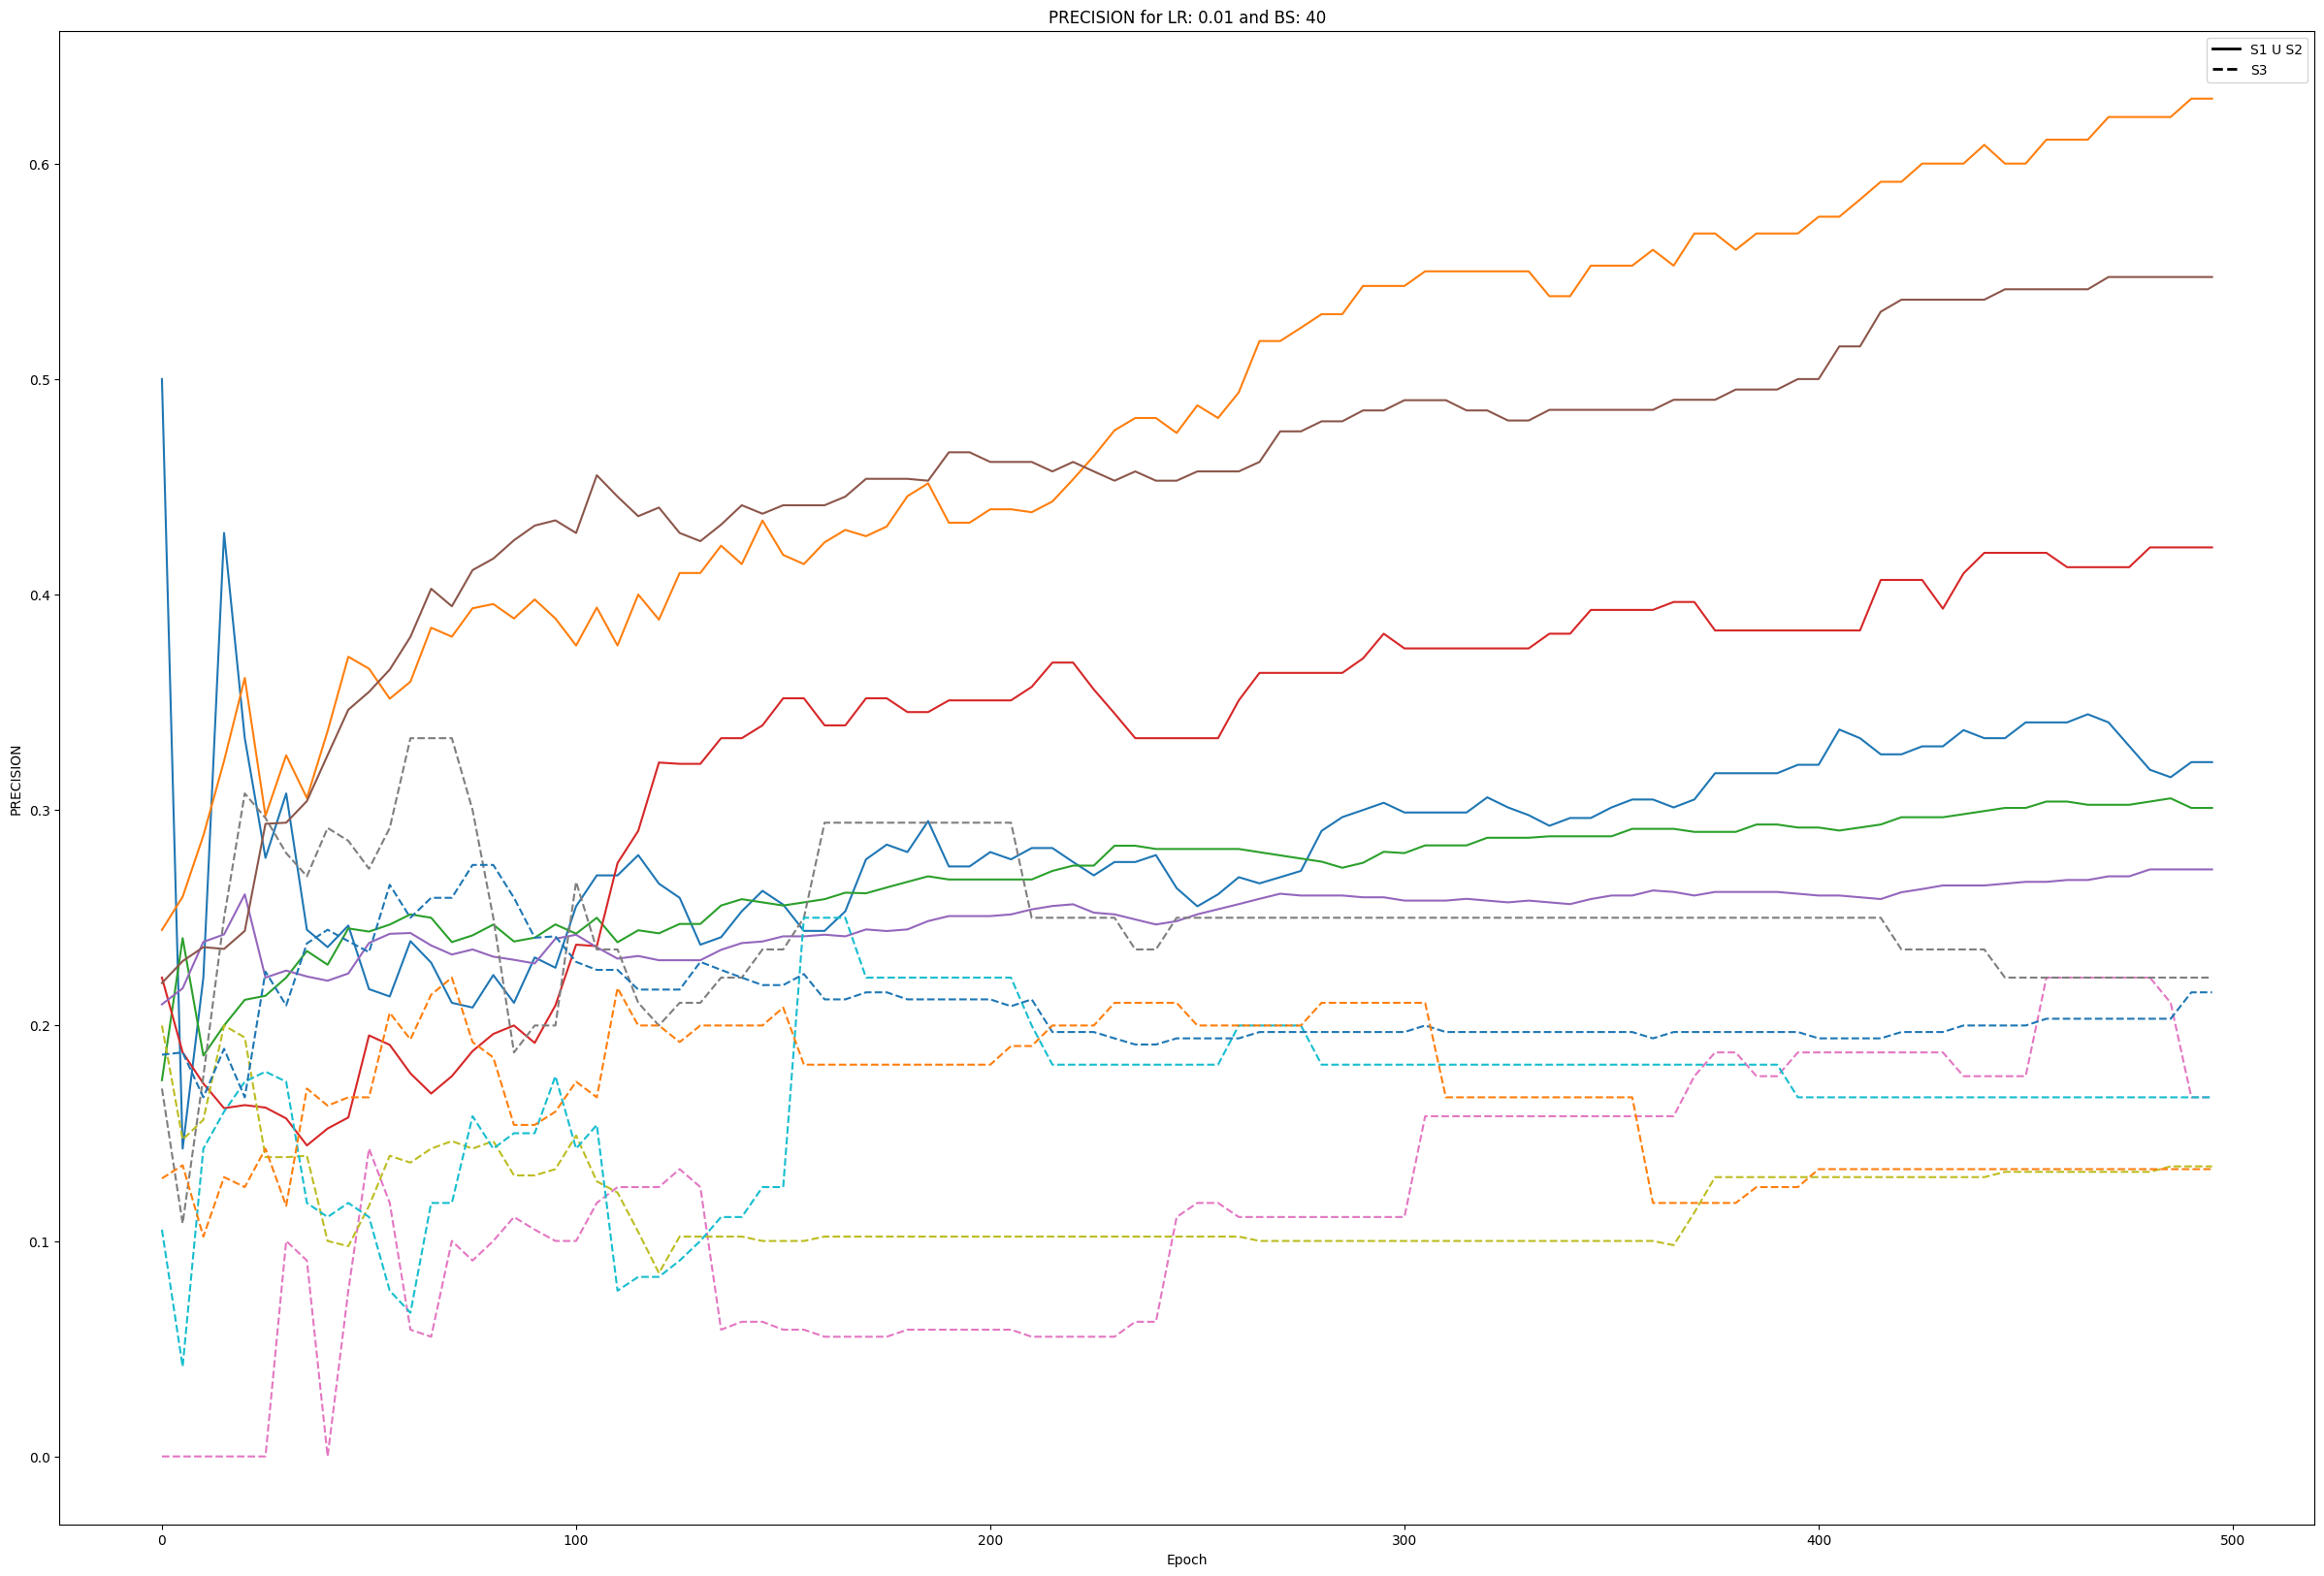

In [106]:
from matplotlib.lines import Line2D
def plot_fig(array1,array2, LR=0, BS=0,title=''):
  fig, ax = plt.subplots(1,1,figsize=(30,20))
  EPOCHS=np.arange(0,500,5)
  #print(EPOCHS)
  r=array1

  # Create custom legend entries with labels and line styles
  legend_entries = [
    Line2D([0], [0], color='black', lw=2, linestyle='solid', label='S1 U S2'),
    Line2D([0], [0], color='black', lw=2, linestyle='dashed', label='S3'),
  ]
  print(r)
      #print(EPOCHS.shape,r.shape)
  for k in range(r.shape[1]):
        ax.plot(EPOCHS,r[:,k],label=f"Class: {k+1}",linestyle='solid')
  ax.legend()


  r=array2
      #print(EPOCHS.shape,r.shape)
  for k in range(r.shape[1]):
        ax.plot(EPOCHS,r[:,k],linestyle='dashed')

  ax.set_title(f"{title} for LR: {LR} and BS: {BS}")
  ax.set_xlabel("Epoch")
  ax.set_ylabel("PRECISION")
  ax.legend(handles=legend_entries)
  plt.show()

plot_fig(p_train,p_val,0.01,40,'PRECISION')

In the above Precision vs Epochs plot, the solid lines stand for S1 U S2, while the dashed ones stand for S3.

The plot is a bit cluttered as we need to plot precision for 6 classes, for both train and validation, giving us 12 lines.


## COMMENTS:

- We see that while at the start the precison values fluctuate a lot, they eventually stabalize.
- In general, the train precision values (solid) are higher than the validation precision values (dashed), indicating some sort of overfitting.
- Different classes have different precisions at convergence, indicating the model does not predict all classes uniformly.

### ACCURACY VS EPOCH

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.21666667 0.22857143 0.23214286 0.24047619 0.25595238 0.24761905
 0.25357143 0.24880952 0.25595238 0.26904762 0.27261905 0.27261905
 0.27619048 0.27619048 0.26904762 0.275      0.27619048 0.27261905
 0.275      0.28095238 0.28452381 0.29047619 0.28452381 0.29047619
 0.28928571 0.29047619 0.28809524 0.29404762 0.29761905 0.30119048
 0.3        0.29880952 0.3        0.30238095 0.30595238 0.30714286
 0.30833333 0.31190476 0.30952381 0.30952381 0.31071429 0.31071429
 0.31190476 0.31428571 0.31547619 0.31309524 0.31547619 0.31428571
 0.31309524 0.31071429 0.31309524 0.31428571 0.31785714 0.32261905
 0.325      0.325      0.32738095 0.32738095 0.3297619  0.33214286
 0.33095238 0.33214286 0.33214286 0.33214286 0.33333333 0.33214286
 0.33214286 0.33095238 0.33095238 0.33333333 0.33452381 0.33571429
 0.33690476 0.33690476 0.33690476 0.33809524 0.33809524 0.33928571
 0.33928571 0.33928571 0.33928571 0.34166667 0.34166667 0.34404762
 0.34642857 0.34761905 0.34761905 0.35       0.35119048 0.3523

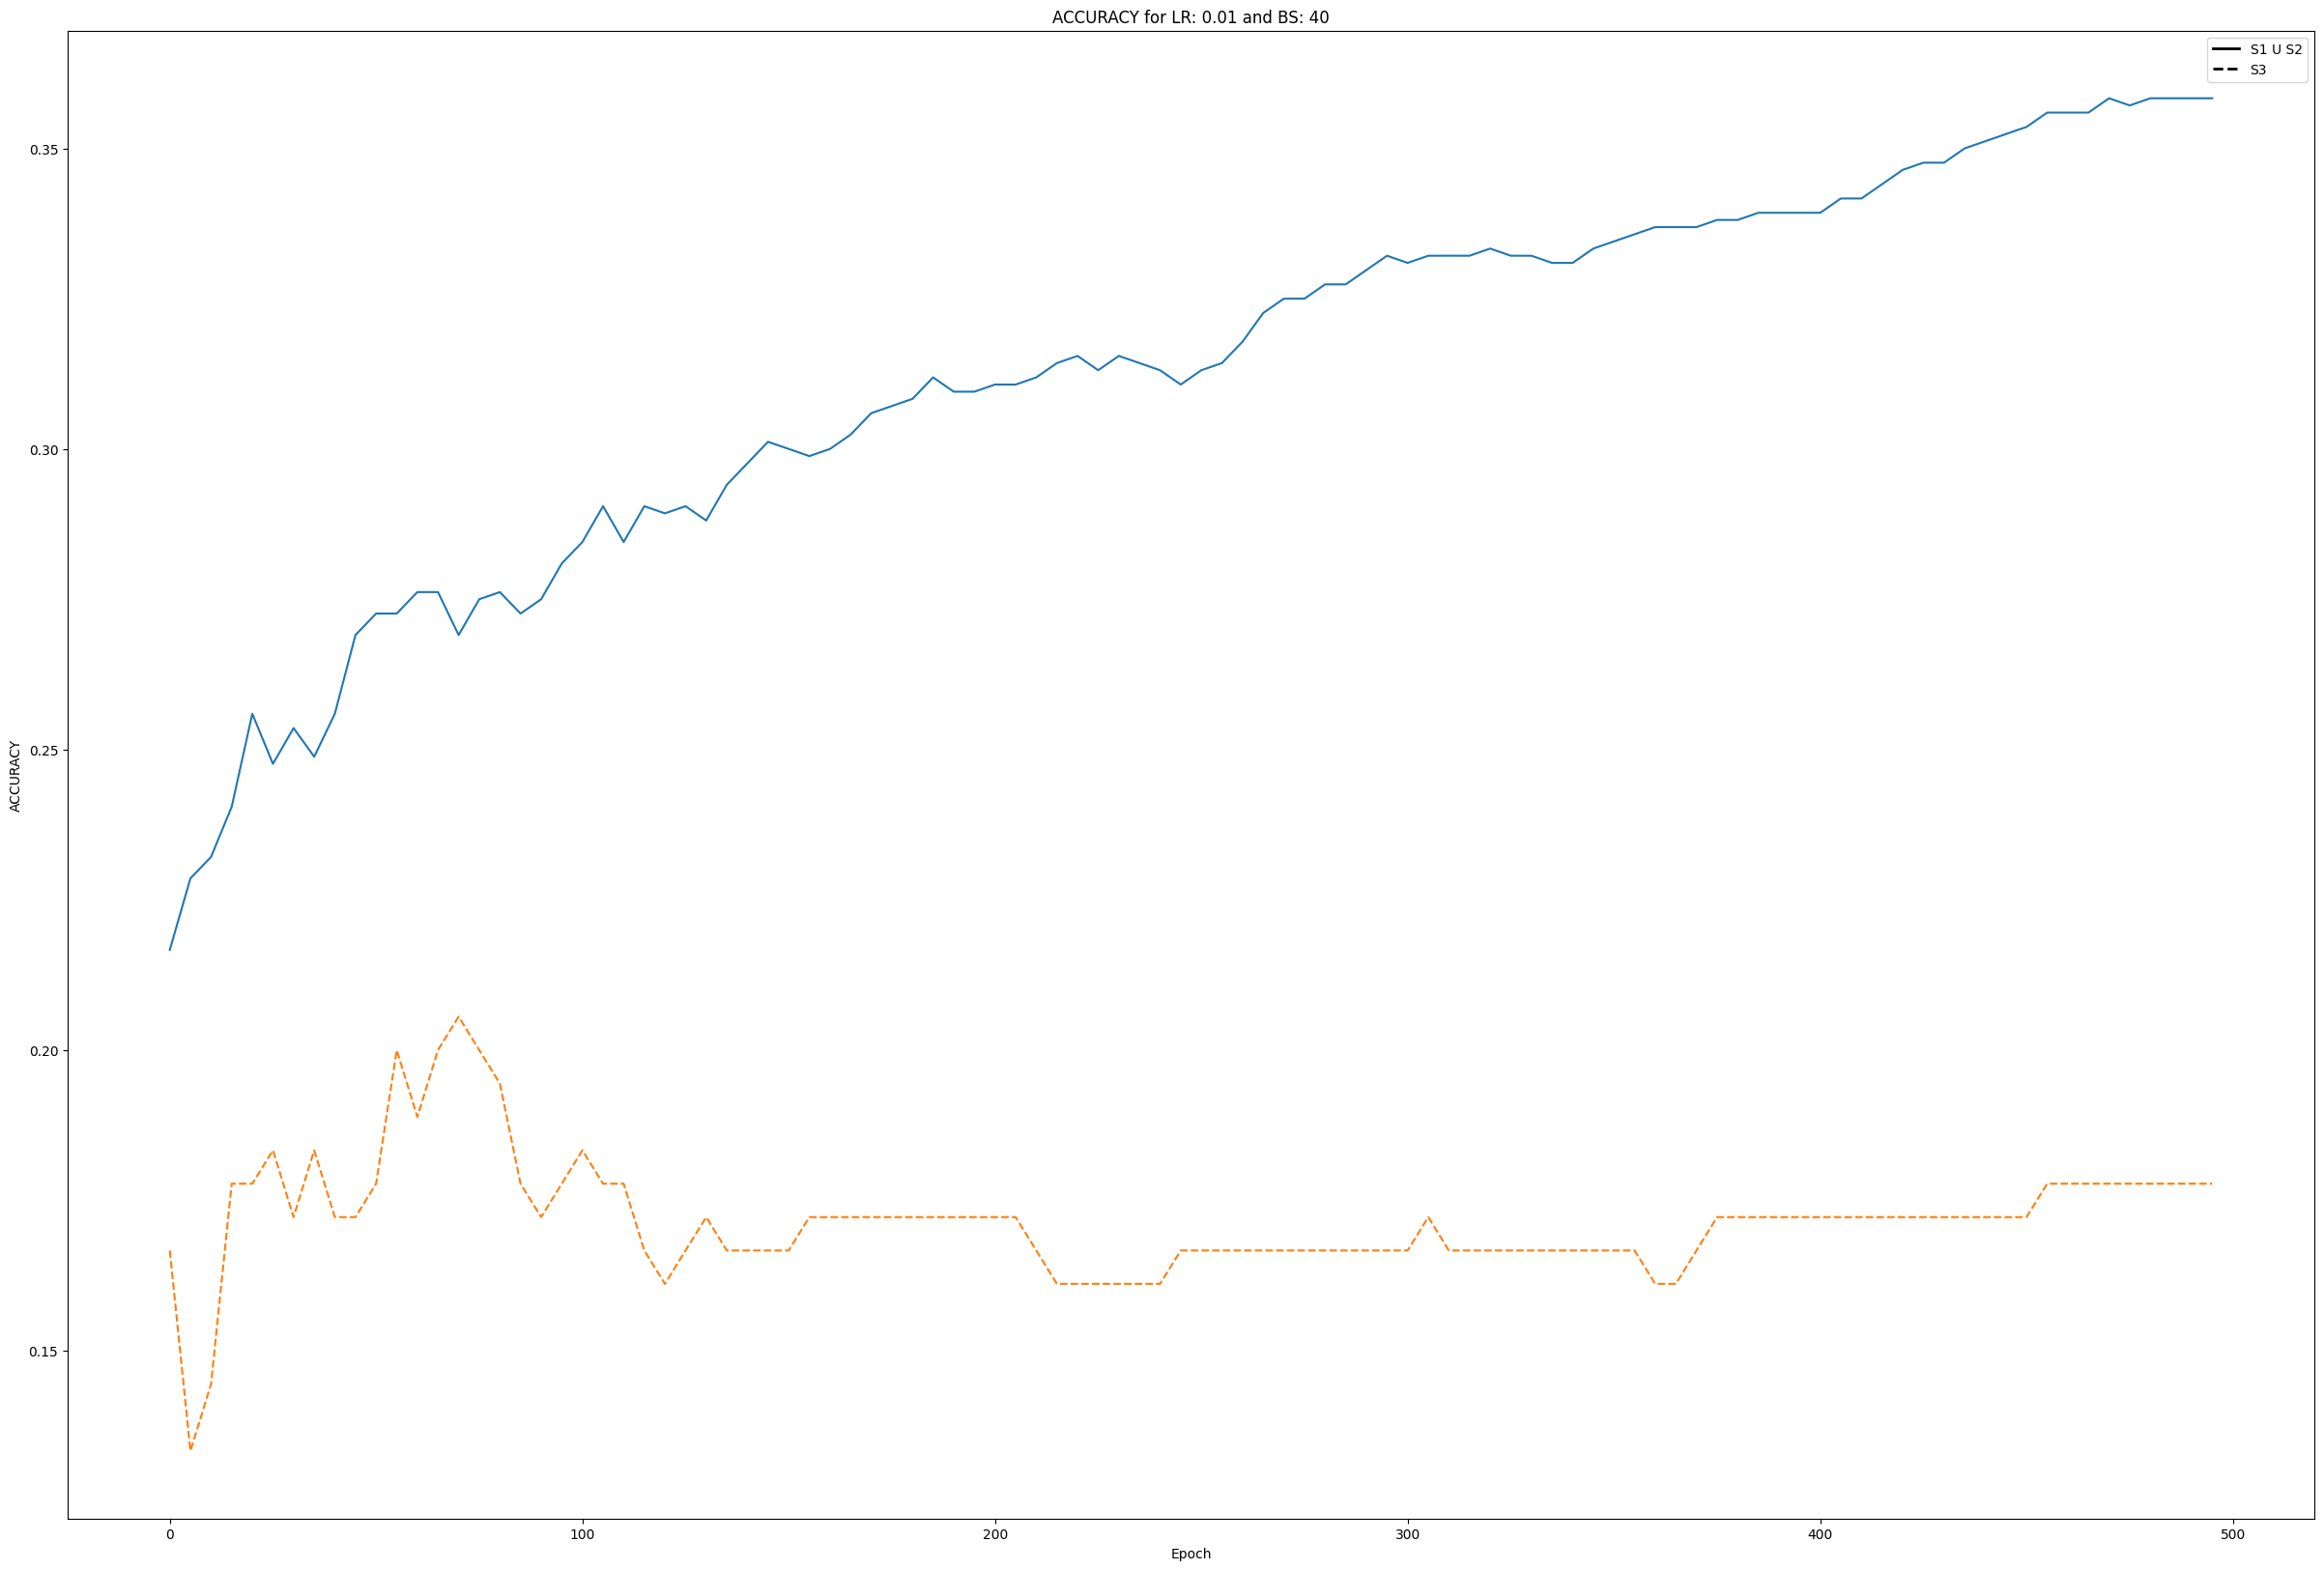

In [107]:
# calculate accuracy
from matplotlib.lines import Line2D
def plot_fig(array1,array2, LR=0, BS=0,title=''):
  fig, ax = plt.subplots(1,1,figsize=(30,20))
  EPOCHS=np.arange(0,500,5)
  #print(EPOCHS)
  r=array1

  # Create custom legend entries with labels and line styles
  legend_entries = [
    Line2D([0], [0], color='black', lw=2, linestyle='solid', label='S1 U S2'),
    Line2D([0], [0], color='black', lw=2, linestyle='dashed', label='S3'),
  ]
  print(r)
      #print(EPOCHS.shape,r.shape)
  ax.plot(EPOCHS,r,linestyle='solid')
  ax.legend()


  r=array2
      #print(EPOCHS.shape,r.shape)

  ax.plot(EPOCHS,r,linestyle='dashed')

  ax.set_title(f"{title} for LR: {LR} and BS: {BS}")
  ax.set_xlabel("Epoch")
  ax.set_ylabel("ACCURACY")
  ax.legend(handles=legend_entries)
  plt.show()

plot_fig(a_train,a_val,0.01,40,"ACCURACY")

### COMMENTS:

- In the above Accuracy vs Epochs plot, the blue line stands for S1 U S2, while the orange one stands for S3. From here we can see that accuracy is increasing in the validation set.